In [1]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/Embeded_FS/EmbededFS-results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['Embeded_FS', 'RFselect01-auc-MI2023.csv', 'split']
列表名： ['LR', 'SVM', 'KNN', 'RF', 'NB', 'STACK', 'RFFI', 'RFFI1']


In [2]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [3]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'RFFI'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/Embeded_FS/EmbededFS-results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/Train-FS-ZSCORE-MI.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/InternalTest-FS-ZSCORE-MI.csv")
test1 = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/ExternalTest-FS-ZSCORE-MI.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
test1=test1[data.keys()]
test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/Train-FS-ZSCORE-MI-RFFI.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/InternalTest-FS-ZSCORE-MI-RFFI.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
test1.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/ExternalTest-FS-ZSCORE-MI-RFFI.csv",index=None)



In [4]:
train.shape

(226, 14)

In [5]:
test.shape

(57, 14)

In [6]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [7]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [8]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/Train-FS-ZSCORE-MI-RFFI.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 14 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   PET_original_firstorder_Kurtosis                       226 non-null    float64
 1   PET_original_glrlm_GrayLevelNonUniformity              226 non-null    float64
 2   CT_wavelet-HHL_firstorder_Maximum                      226 non-null    float64
 3   CT_wavelet-LHH_glszm_SizeZoneNonUniformityNormalized   226 non-null    float64
 4   CT_original_glcm_Contrast                              226 non-null    float64
 5   CT_wavelet-HLH_glcm_Correlation                        226 non-null    float64
 6   CT_wavelet-HHL_firstorder_Skewness                     226 non-null    float64
 7   PET_original_shape_Elongation                          226 non-null    float64
 8   CT_lbp-3D-k_glszm_SizeZoneNonUniformityNormalized 

count   mean   std  \
PET_original_firstorder_Kurtosis                   226.000  0.000 1.002   
PET_original_glrlm_GrayLevelNonUniformity          226.000 -0.000 1.002   
CT_wavelet-HHL_firstorder_Maximum                  226.000 -0.000 1.002   
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNorma... 226.000 -0.000 1.002   
CT_original_glcm_Contrast                          226.000  0.000 1.002   
CT_wavelet-HLH_glcm_Correlation                    226.000  0.000 1.002   
CT_wavelet-HHL_firstorder_Skewness                 226.000 -0.000 1.002   
PET_original_shape_Elongation                      226.000  0.000 1.002   
CT_lbp-3D-k_glszm_SizeZoneNonUniformityNormalized  226.000 -0.000 1.002   
CT_original_glcm_Imc1                              226.000 -0.000 1.002   
CT_wavelet2-HLH_glszm_SizeZoneNonUniformityNorm... 226.000  0.000 1.002   
PET_original_shape_LeastAxisLength                 226.000  0.000 1.002   
CT_wavelet-HLH_firstorder_Mean                     226.000 -0.000 1.002   
label                                              226.000  0.389 0.489   

                                                      min    10%    25%  \
PET_original_firstorder_Kurtosis                   -1.135 -0.898 -0.656   
PET_original_glrlm_GrayLevelNonUniformity          -0.475 -0.427 -0.376   
CT_wavelet-HHL_firstorder_Maximum                  -1.210 -0.885 -0.660   
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNorma... -2.645 -1.036 -0.584   
CT_original_glcm_Contrast                          -1.428 -1.099 -0.647   
CT_wavelet-HLH_glcm_Correlation                    -6.280 -0.794 -0.313   
CT_wavelet-HHL_firstorder_Skewness                 -6.435 -0.626 -0.255   
PET_original_shape_Elongation                      -4.501 -1.144 -0.556   
CT_lbp-3D-k_glszm_SizeZoneNonUniformityNormalized  -1.718 -1.164 -0.699   
CT_original_glcm_Imc1                              -4.796 -1.116 -0.351   
CT_wavelet2-HLH_glszm_SizeZoneNonUniformityNorm... -2.361 -1.139 -0.637   
PET_original_shape_LeastAxisLength                 -1.302 -0.875 -0.651   
CT_wavelet-HLH_firstorder_Mean                     -6.257 -0.692 -0.197   
label                                               0.000  0.000  0.000   

                                                      50%   75%   90%   95%  \
PET_original_firstorder_Kurtosis                   -0.292 0.365 1.298 1.819   
PET_original_glrlm_GrayLevelNonUniformity          -0.257 0.017 0.347 0.857   
CT_wavelet-HHL_firstorder_Maximum                  -0.257 0.448 1.020 1.850   
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNorma... -0.143 0.422 1.139 1.536   
CT_original_glcm_Contrast                          -0.173 0.428 1.254 1.952   
CT_wavelet-HLH_glcm_Correlation                     0.130 0.401 0.890 1.359   
CT_wavelet-HHL_firstorder_Skewness                  0.028 0.326 0.763 1.094   
PET_original_shape_Elongation                       0.043 0.613 1.202 1.540   
CT_lbp-3D-k_glszm_SizeZoneNonUniformityNormalized  -0.134 0.574 1.088 1.585   
CT_original_glcm_Imc1                               0.229 0.663 0.900 1.066   
CT_wavelet2-HLH_glszm_SizeZoneNonUniformityNorm... -0.092 0.450 1.272 1.801   
PET_original_shape_LeastAxisLength                 -0.257 0.402 0.955 1.666   
CT_wavelet-HLH_firstorder_Mean                      0.009 0.262 0.669 1.265   
label                                               0.000 1.000 1.000 1.000   

                                                     99%   max  
PET_original_firstorder_Kurtosis                   3.212 6.638  
PET_original_glrlm_GrayLevelNonUniformity          5.088 9.197  
CT_wavelet-HHL_firstorder_Maximum                  3.211 6.379  
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNorma... 3.169 6.657  
CT_original_glcm_Contrast                          3.372 4.737  
CT_wavelet-HLH_glcm_Correlation                    2.520 3.069  
CT_wavelet-HHL_firstorder_Skewness                 2.332 6.668  
PET_original_shape_Elongation                      1.867 1.960  
CT_lbp-3D-k_glszm_SizeZoneNonU

In [9]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


PET_original_firstorder_Kurtosis                         0
PET_original_glrlm_GrayLevelNonUniformity                0
CT_wavelet-HHL_firstorder_Maximum                        0
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNormalized     0
CT_original_glcm_Contrast                                0
CT_wavelet-HLH_glcm_Correlation                          0
CT_wavelet-HHL_firstorder_Skewness                       0
PET_original_shape_Elongation                            0
CT_lbp-3D-k_glszm_SizeZoneNonUniformityNormalized        0
CT_original_glcm_Imc1                                    0
CT_wavelet2-HLH_glszm_SizeZoneNonUniformityNormalized    0
PET_original_shape_LeastAxisLength                       0
CT_wavelet-HLH_firstorder_Mean                           0
label                                                    0
dtype: int64

In [10]:

# pathdata="C:/Users/zuoya/Desktop/EJR/2023-383CASES-01-CLINICS.csv"
# diabetes_preprocessed = pd.read_csv(pathdata)




# # diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
# df = diabetes_preprocessed.copy()

In [10]:
X_train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/Train-FS-ZSCORE-MI-RFFI.csv")
y_train = X_train['label']
X_train = X_train.drop(labels=['label'], axis=1)

X_test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/InternalTest-FS-ZSCORE-MI-RFFI.csv")
y_test = X_test['label']
X_test = X_test.drop(labels=['label'], axis=1)

In [12]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [13]:
# X_train.to_csv("C:/Users/zuoya/Desktop/EJR/xtrain-2023-383CASES-01-CLINICS.csv")

In [14]:
# X_test.to_csv("C:/Users/zuoya/Desktop/EJR/xtest-2023-383CASES-01-CLINICS.csv")

In [15]:
# y_train.to_csv("C:/Users/zuoya/Desktop/EJR/ytrain-2023-383CASES-01-CLINICS.csv")

In [16]:
# y_test.to_csv("C:/Users/zuoya/Desktop/EJR/ytest-2023-383CASES-01-CLINICS.csv")

In [11]:
# Evaluate each model in turn by looking at train and test errors and scores
from sklearn.metrics import roc_auc_score
def evaluate_classification_model_holdout(models):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

    # Define lists to track names and results for models
    names = []
    train_accuracy_results = []
    test_accuracy_results = []

    print('################ Accuracy scores for test set for the models: ################\n')
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

#         train_accuracy_result = accuracy_score(y_train, y_train_pred)
#         test_accuracy_result = accuracy_score(y_test, y_test_pred)
#         train_accuracy_results.append(train_accuracy_result)
#         test_accuracy_results.append(test_accuracy_result)
        train_accuracy_result = roc_auc_score(y_train, y_train_pred)
        test_accuracy_result = roc_auc_score(y_test, y_test_pred)
        train_accuracy_results.append(train_accuracy_result)
        test_accuracy_results.append(test_accuracy_result)

        names.append(name)
        msg = "%s: %f" % (name, test_accuracy_result)
        print(msg)

    print('\n################ Train and test results for the model: ################\n')
    data_result = pd.DataFrame({'models': names,
                                'accuracy_train': train_accuracy_results,
                                'accuracy_test': test_accuracy_results})
    print(data_result)

    # Plot the results
    plt.figure(figsize=(15, 12))
    sns.barplot(x='accuracy_test', y='models', data=data_result.sort_values(by="accuracy_test", ascending=False), color="r")
    plt.xlabel('AUC Scores')
    plt.ylabel('Models')
    plt.title('AUC Scores For Test Set')
    plt.show()

In [12]:
# Define a function to plot feature_importances
def plot_feature_importances(tuned_model):
    feature_importances = pd.DataFrame({'Importance': tuned_model.feature_importances_ * 100, 'Feature': X_train.columns})
    plt.figure()
    sns.barplot(x="Importance", y="Feature", data=feature_importances.sort_values(by="Importance", ascending=False))
    plt.title('Feature Importance') # TODO tuned_model.__name__
    plt.show()


In [13]:
# Function to plot confusion_matrix
def plot_confusion_matrix(model, X_test, y_test, normalize=True):
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    plt.figure(figsize=(15, 15))
    plt.show()

In [14]:
# Function to plot confusion_matrix
def plot_confusion_matrix_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    model_cm = ConfusionMatrix(model, percent=True, classes=["EGFR Wild", "EGFR Mutated"], cmap='Blues')
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    model_cm.show();

In [15]:
# Function to plot classification_report by using yellowbrick
def plot_classification_report_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ClassificationReport(model, classes=["EGFR Wild", "EGFR Mutated"], support=True, cmap='Blues')
    visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof()
    # visualizer.show();

In [16]:
# Funtion to plot ROC-AUC Curve
def plot_roc_auc_curve(model):
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model,' Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [17]:
# Funtion to plot ROC-AUC Curve by using yellowbrick
def plot_roc_auc_curve_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ROCAUC(model, classes=["EGFR Wild", "EGFR Mutated"])
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show();  # Finalize and show the figure

In [18]:
# Function to plot prediction errors
def plot_class_prediction_error_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(model, classes=["EGFR Wild", "EGFR Mutated"], cmap='Blues')
    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    # Draw visualization
    visualizer.show();

In [19]:
# Function to plot learning curves
def plot_learning_curve(model_tuned):
    # Create the learning curve visualizer
    cv = StratifiedKFold(n_splits=12)
    sizes = np.linspace(0.3, 1.0, 10)
    # Instantiate the classification model and visualizer
    visualizer = LearningCurve(model_tuned, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4)
    visualizer.fit(X, y)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure

In [20]:
# Function to report results quickly
def report_results_quickly(model):
    fig, axes = plt.subplots(2, 2,figsize=(15, 9))
    model = model
    visualgrid = [FeatureImportances(model, ax=axes[0][0]),
                  ConfusionMatrix(model, ax=axes[0][1], cmap='Blues'),
                  ClassificationReport(model, ax=axes[1][0], cmap='Blues'),
                  ROCAUC(model, ax=axes[1][1])]
    for viz in visualgrid:
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()
    plt.show()

In [21]:
# Function to plot all the results
def plot_results(model):
    plot_confusion_matrix_yb(model)
    plot_classification_report_yb(model)
    plot_roc_auc_curve_yb(model)
    plot_class_prediction_error_yb(model)


In [22]:
def Save_to_Csv(data, file_name, Save_format = 'csv', Save_type = 'col'):
    # data
    # 输入为一个字典，格式： { '列名称': 数据,....} 
    # 列名即为CSV中数据对应的列名， 数据为一个列表
    
    # file_name 存储文件的名字
    # Save_format 为存储类型， 默认csv格式， 可改为 excel
    # Save_type 存储类型 默认按列存储， 否则按行存储
    
    # 默认存储在当前路径下
    
    import pandas as pd
    import numpy as np
    
    Name = []
    times = 0
 
    if Save_type == 'col':
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List).reshape(-1,1)
            else:
                Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
            times += 1
            
        Pd_data = pd.DataFrame(columns=Name, data=Data) 
        
    else:
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List)
            else:
                Data = np.vstack((Data, np.array(List)))
        
            times += 1
    
        Pd_data = pd.DataFrame(index=Name, data=Data)  
    
    if Save_format == 'csv':
        Pd_data.to_csv('./'+ file_name +'.csv',encoding='utf-8')
    else:
        Pd_data.to_excel('./'+ file_name +'.xls',encoding='utf-8')

In [23]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [24]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.488636
Naive Bayes: 0.554924
KNN: 0.551136
SVM: 0.477273
ANN: 0.452652
CART: 0.524621
BaggedTrees: 0.473485
RF: 0.587121
AdaBoost: 0.609848
GBM: 0.604167
XGBoost: 0.632576
LightGBM: 0.570076
CatBoost: 0.596591
NGBoost: 0.623106

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.621          0.489
1          Naive Bayes           0.572          0.555
2                  KNN           0.753          0.551
3                  SVM           0.779          0.477
4                  ANN           0.830          0.453
5                 CART           1.000          0.525
6          BaggedTrees           0.960          0.473
7                   RF           1.000          0.587
8             AdaBoost           0.949          0.610
9                  GBM           1.000          0.604
10

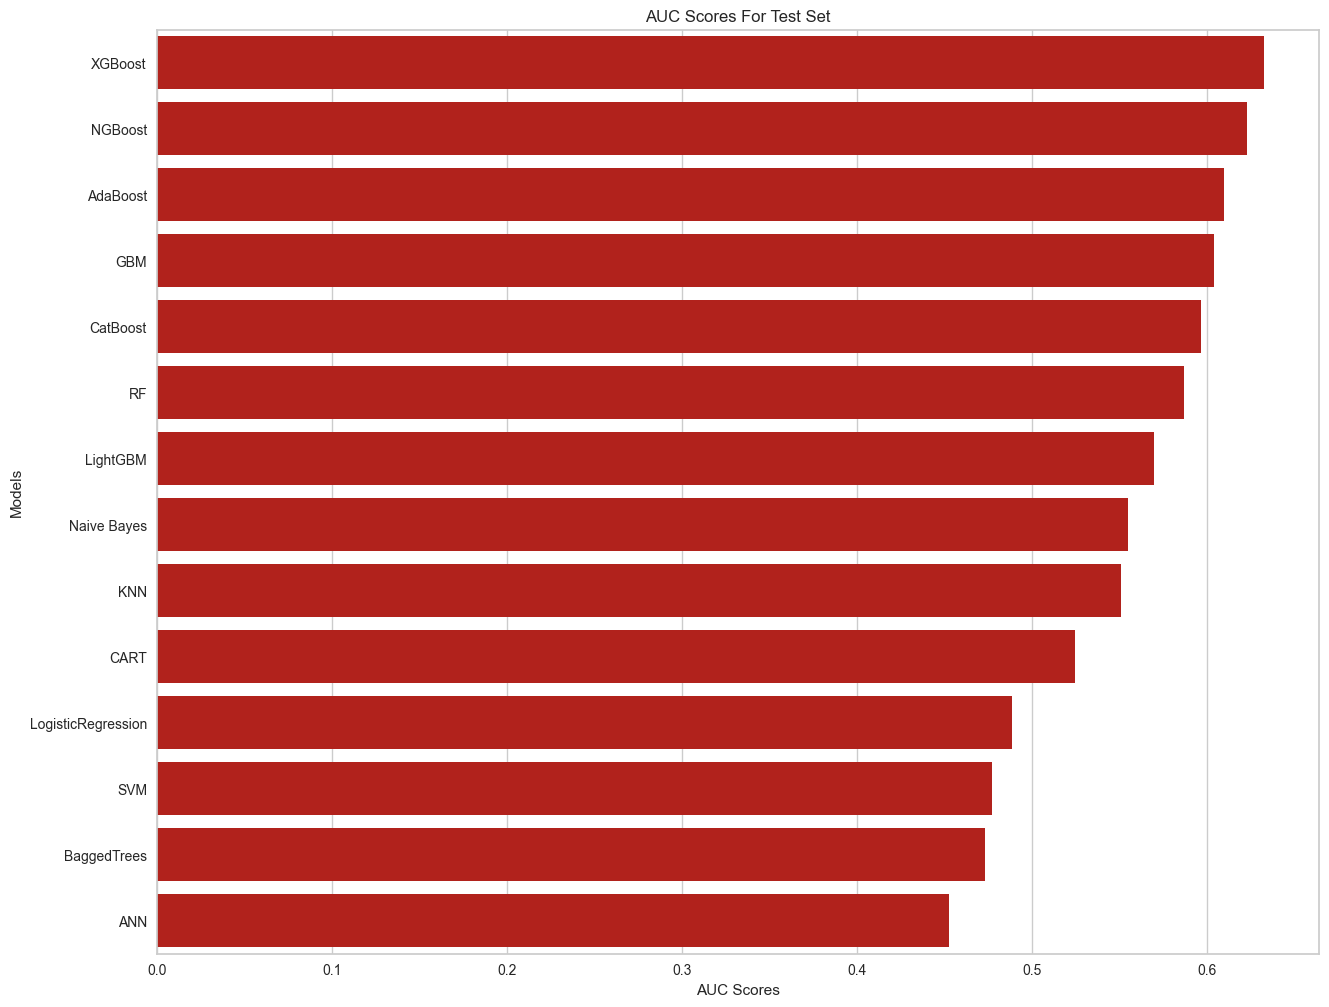

In [31]:
evaluate_classification_model_holdout(base_models)

In [26]:
evaluate_classification_model_holdout(base_models)
# LogisticRegression: 0.618243
# Naive Bayes: 0.563707
# KNN: 0.605212
# SVM: 0.563707
# ANN: 0.569015
# CART: 0.542954
# BaggedTrees: 0.663127
# RF: 0.698842
# AdaBoost: 0.645270
# GBM: 0.708012
# XGBoost: 0.685811
# LightGBM: 0.663127
# CatBoost: 0.658301
# NGBoost: 0.662645   422


################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.534091
Naive Bayes: 0.583333
KNN: 0.534091
SVM: 0.517045
ANN: 0.462121
CART: 0.467803
BaggedTrees: 0.410985
RF: 0.501894
AdaBoost: 0.556818
GBM: 0.462121
XGBoost: 0.473485
LightGBM: 0.498106
CatBoost: 0.465909
NGBoost: 0.482955

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.628          0.534
1          Naive Bayes           0.620          0.583
2                  KNN           0.696          0.534
3                  SVM           0.739          0.517
4                  ANN           0.873          0.462
5                 CART           1.000          0.468
6          BaggedTrees           0.974          0.411
7                   RF           1.000          0.502
8             AdaBoost           0.951          0.557
9                  GBM           1.000          0.462
10

In [27]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

################ Accuracy scores for test set for the models: ################

GaussianNB: 0.583333

################ Train and test results for the model: ################

       models  accuracy_train  accuracy_test
0  GaussianNB           0.620          0.583


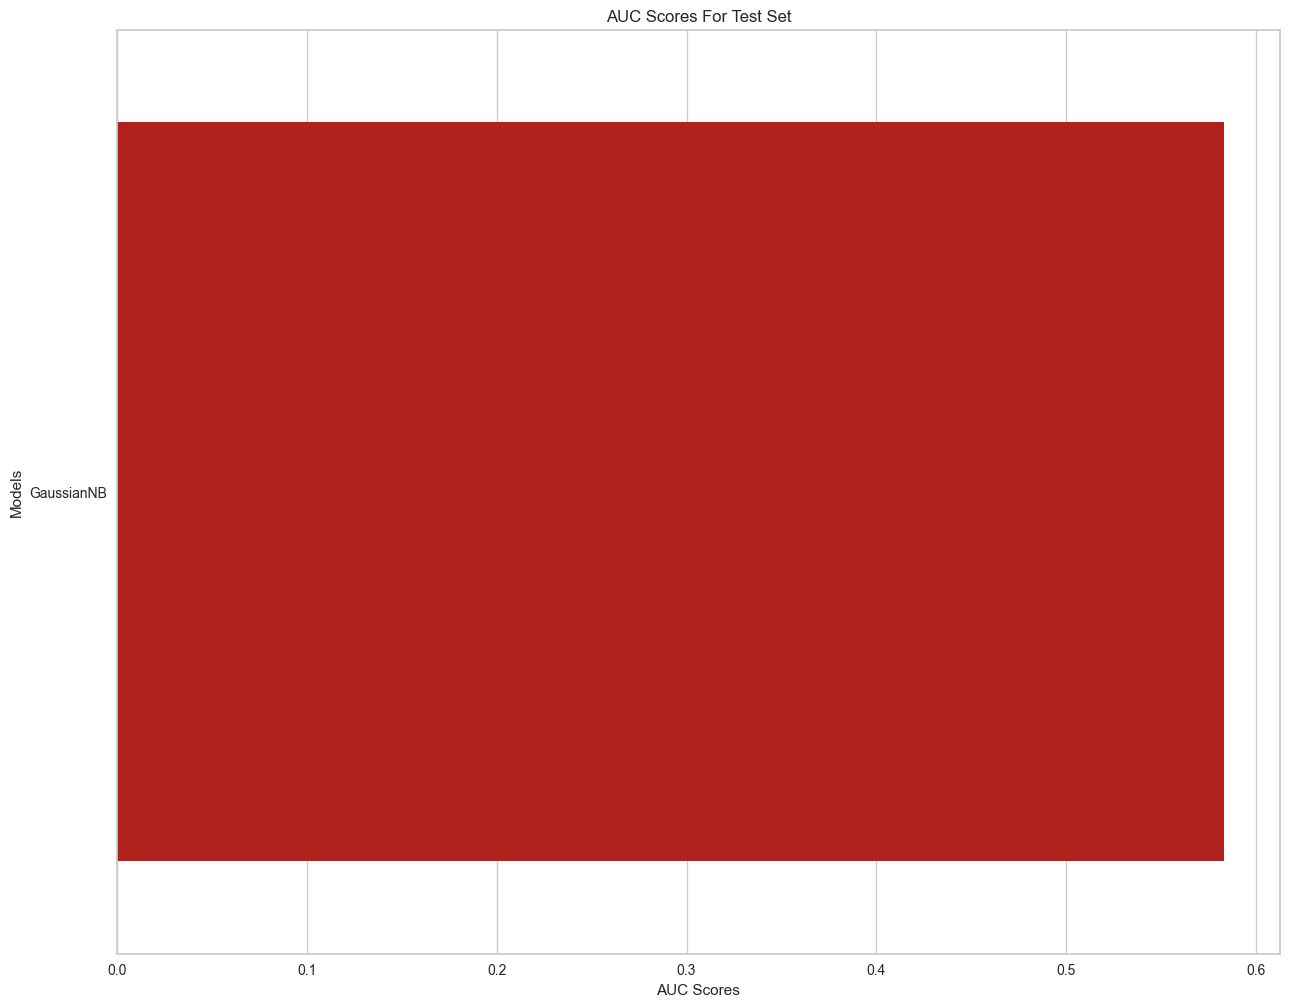

In [28]:
# LogisticRegression with make_pipeline
GNBreg = make_pipeline(MinMaxScaler(), GaussianNB())
evaluate_classification_model_holdout([('GaussianNB', GNBreg)]) # 0.805 instead of  0.805195

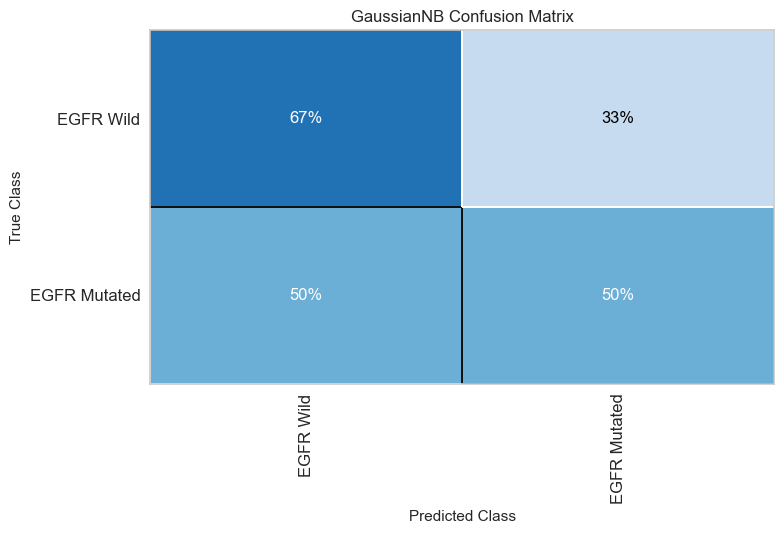

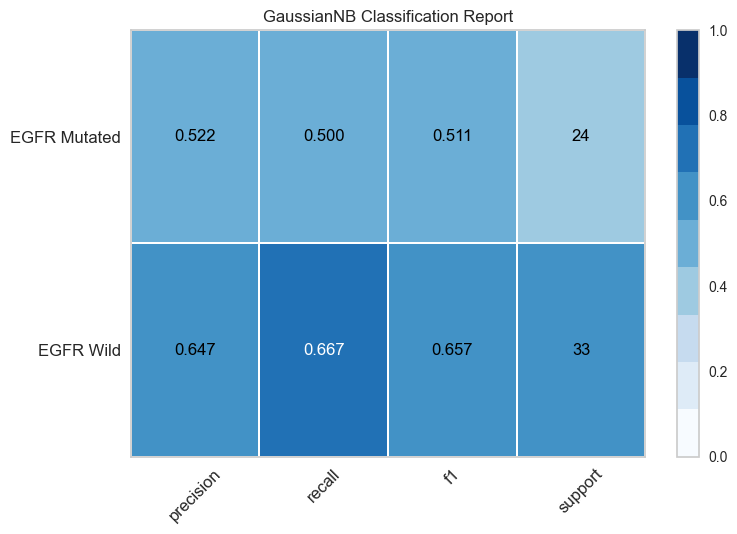

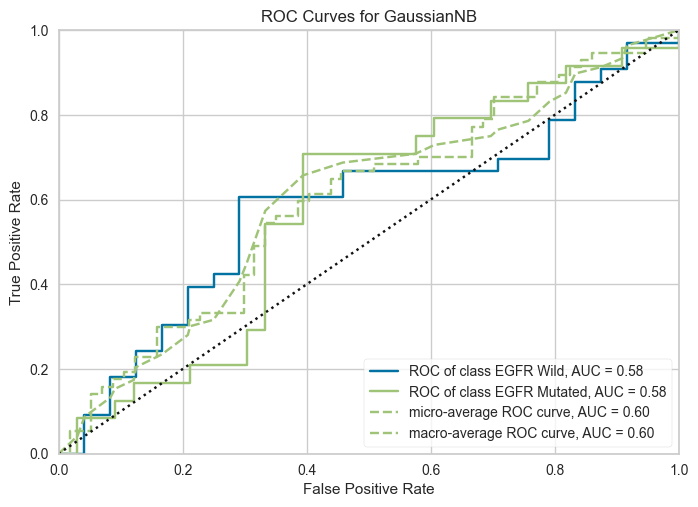

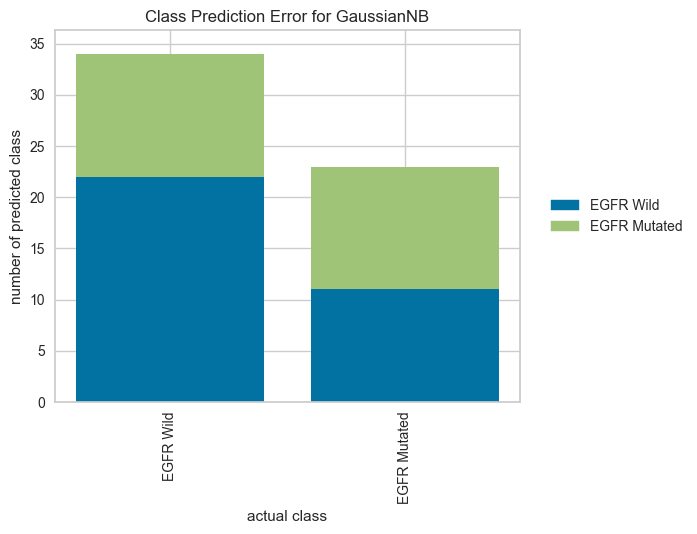

NameError: name 'X' is not defined

In [29]:
# plot_feature_importances(GNBreg)
plot_results(GNBreg)
# report_results_quickly(GNBreg)
plot_learning_curve(GNBreg)

################ Accuracy scores for test set for the models: ################

KNN: 0.585227

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    KNN           0.696          0.585


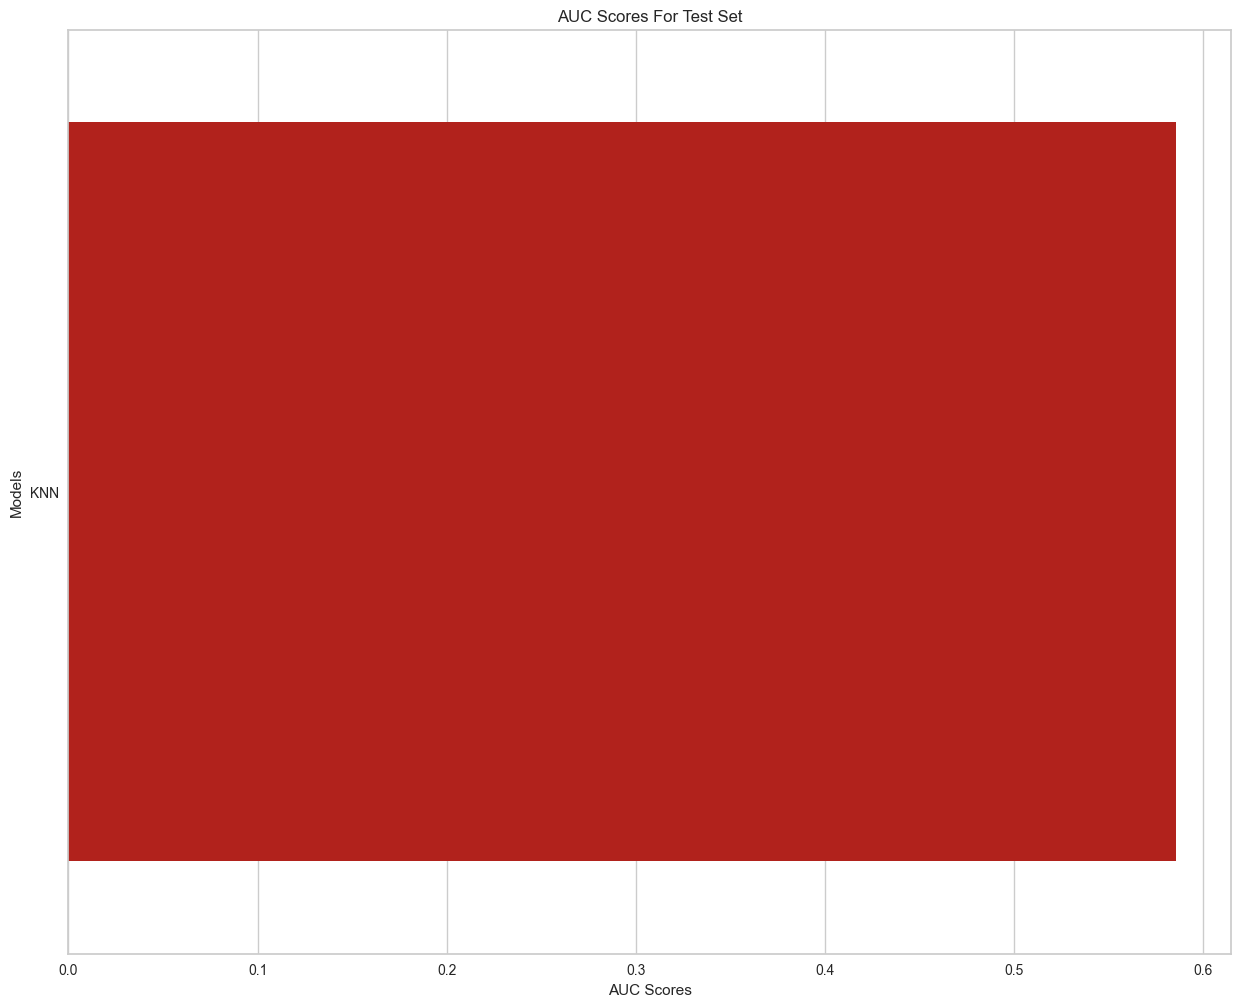

In [30]:
# LogisticRegression with make_pipeline
KNNreg = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', KNNreg)]) # 0.805 instead of  0.805195

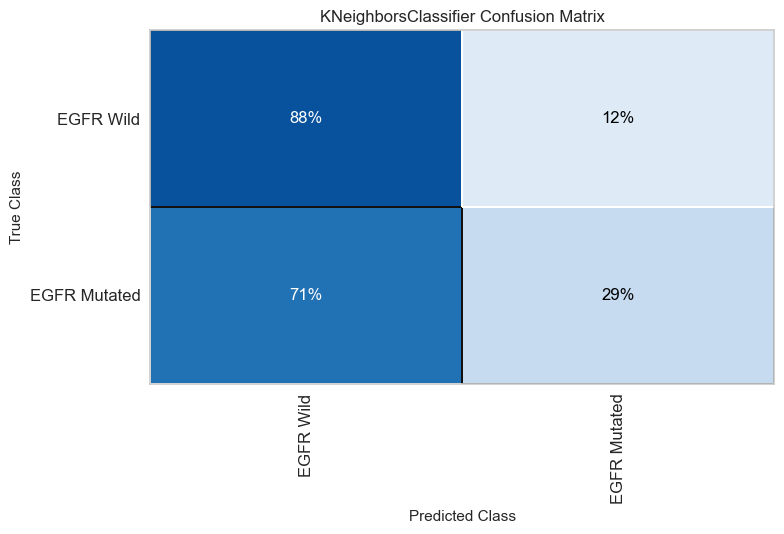

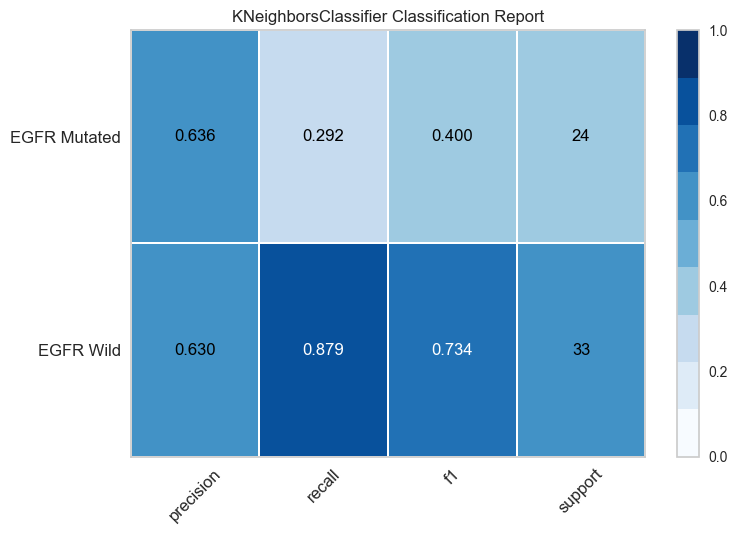

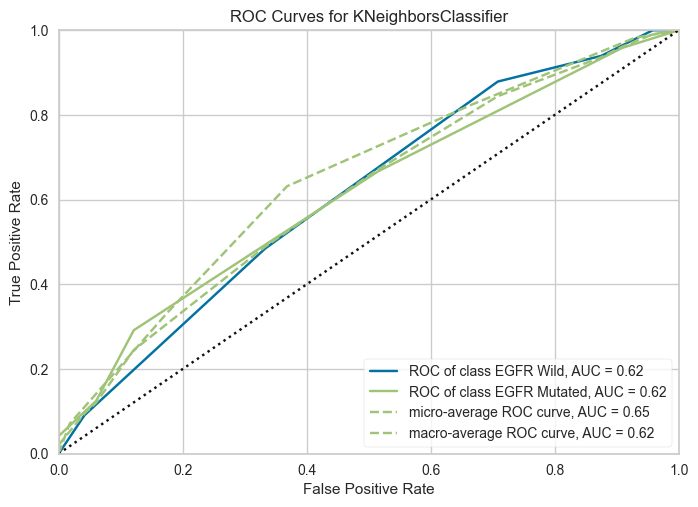

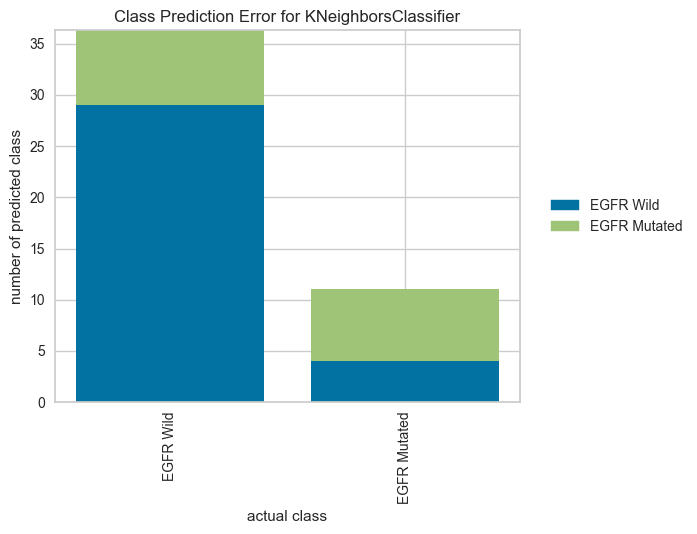

NameError: name 'X' is not defined

In [31]:
# plot_feature_importances(KNNreg)
plot_results(KNNreg)
# report_results_quickly(KNNreg)
plot_learning_curve(KNNreg)

In [ ]:
# LogisticRegression with make_pipeline
MLPreg = make_pipeline(MinMaxScaler(), MLPClassifier())
evaluate_classification_model_holdout([('MLP', MLPreg)]) # 0.805 instead of  0.805195

In [32]:
# plot_feature_importances(MLPreg)
plot_results(MLPreg)
# report_results_quickly(MLPreg)
plot_learning_curve(MLPreg)

NameError: name 'MLPreg' is not defined

################ Accuracy scores for test set for the models: ################

DT: 0.490530

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     DT           1.000          0.491


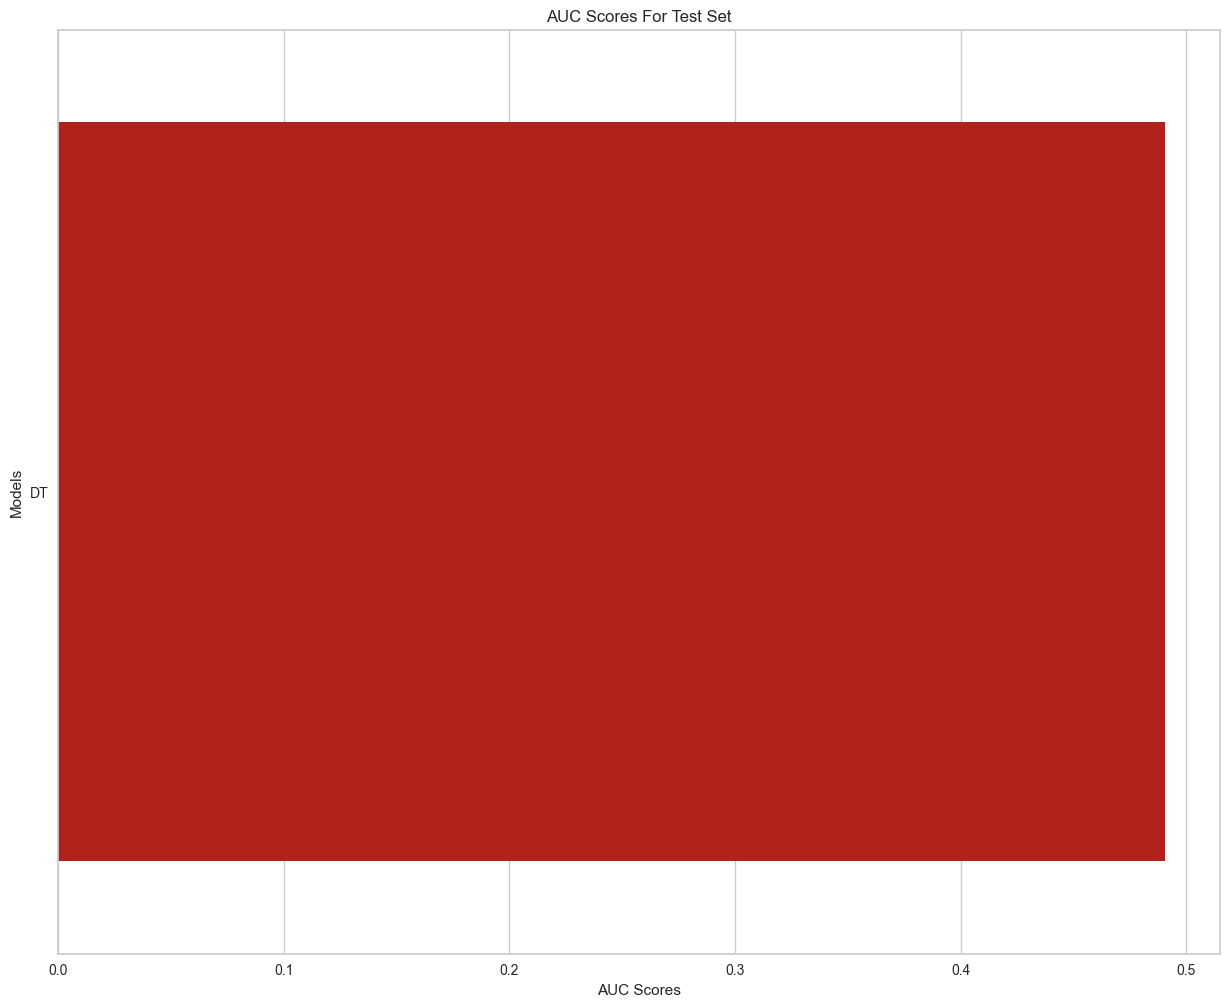

In [33]:
# LogisticRegression with make_pipeline
DTreg = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
evaluate_classification_model_holdout([('DT', DTreg)]) # 0.805 instead of  0.805195

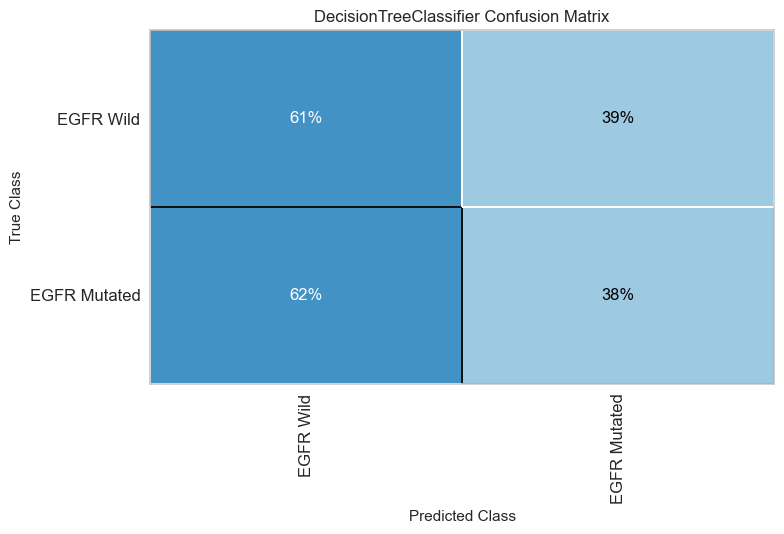

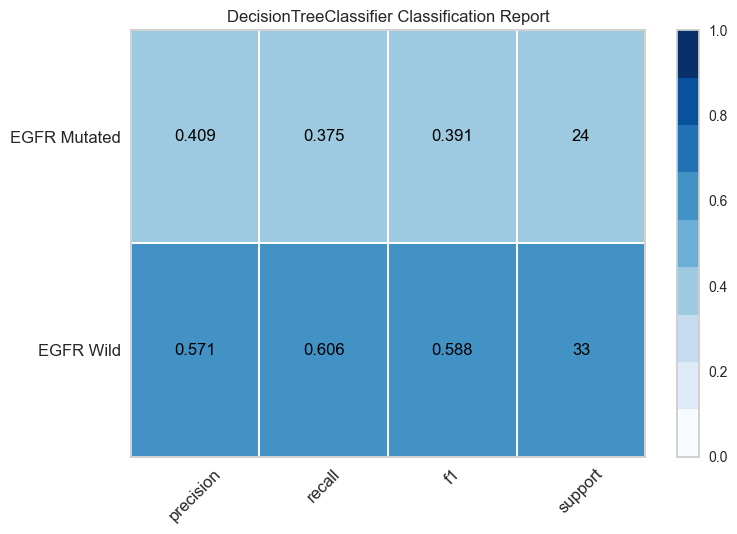

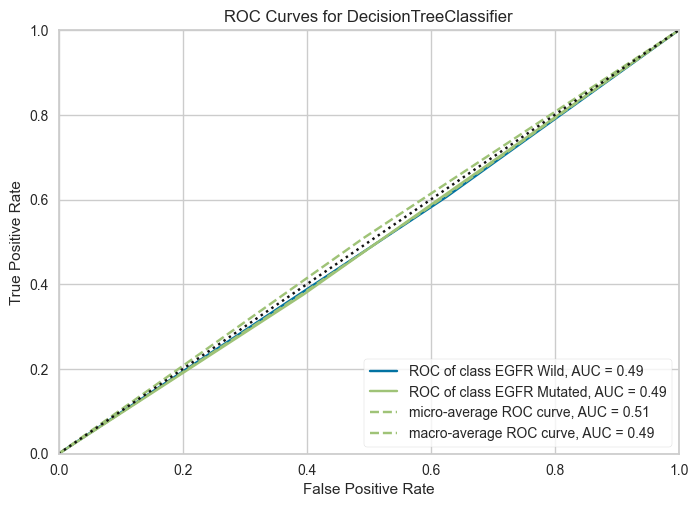

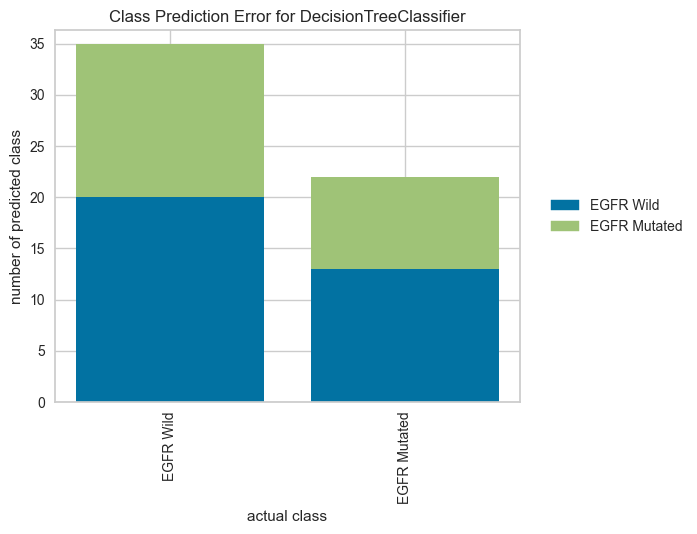

NameError: name 'X' is not defined

In [34]:
# plot_feature_importances(DTreg)
plot_results(DTreg)
# report_results_quickly(DTreg)
plot_learning_curve(DTreg)

################ Accuracy scores for test set for the models: ################

BC: 0.507576

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     BC           0.976          0.508


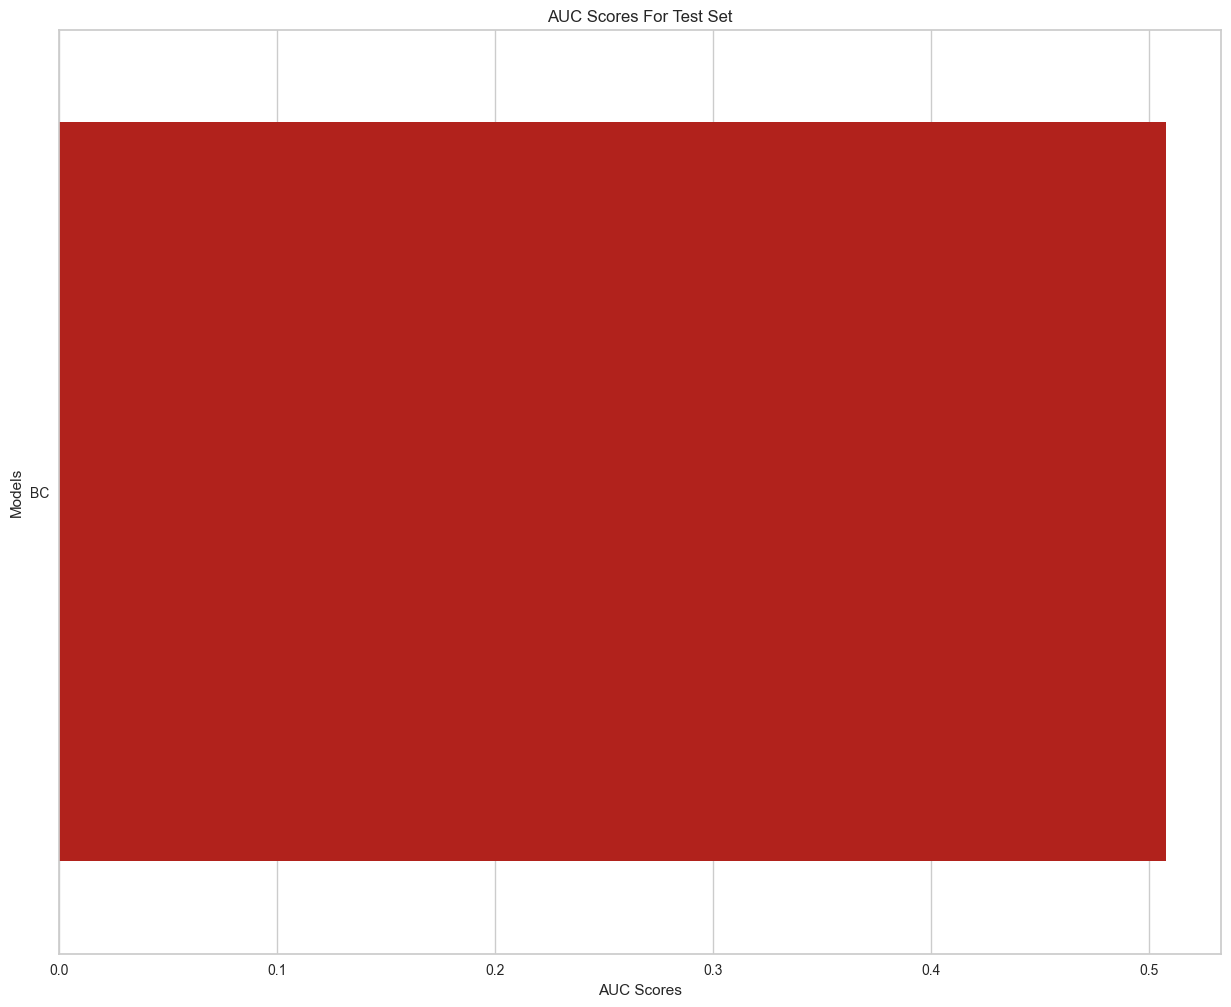

In [35]:
# LogisticRegression with make_pipeline
BCreg = make_pipeline(MinMaxScaler(), BaggingClassifier())
evaluate_classification_model_holdout([('BC', BCreg)]) # 0.805 instead of  0.805195

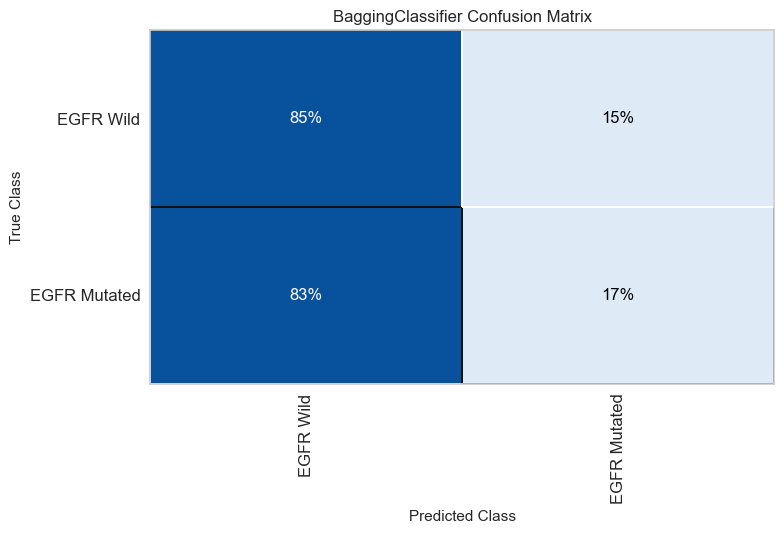

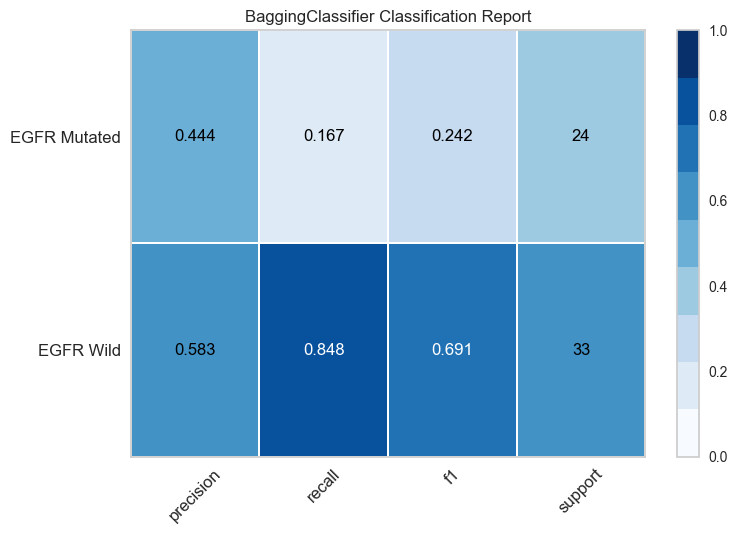

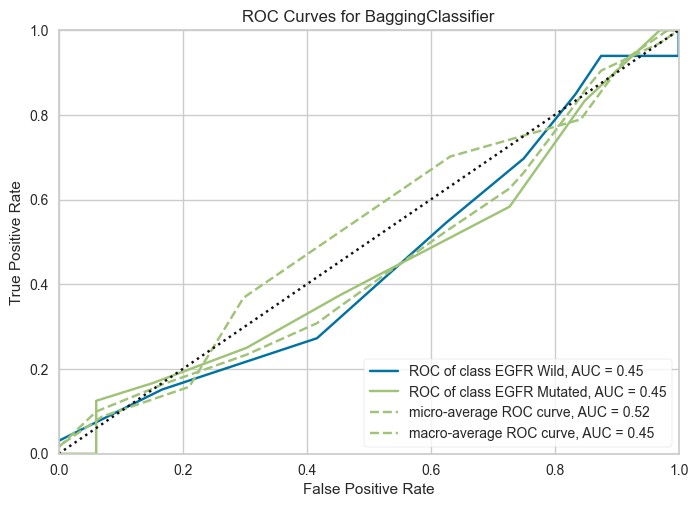

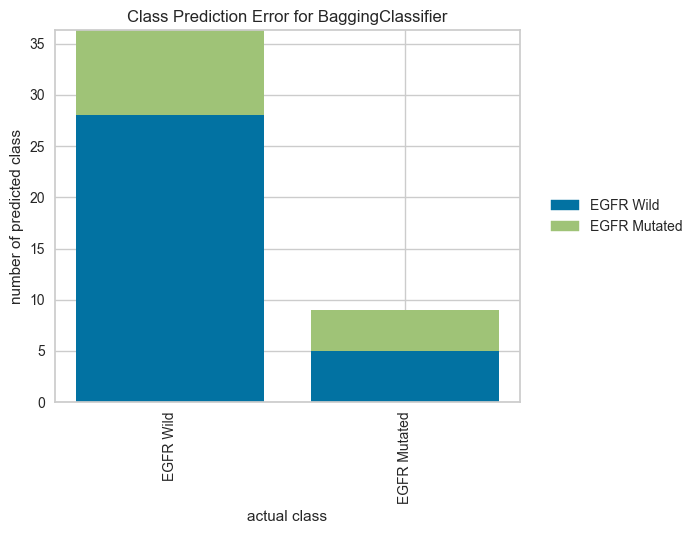

NameError: name 'X' is not defined

In [36]:
# plot_feature_importances(BCreg)
plot_results(BCreg)
# report_results_quickly(BCreg)
plot_learning_curve(BCreg)

################ Accuracy scores for test set for the models: ################

GBM: 0.482955

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    GBM           1.000          0.483


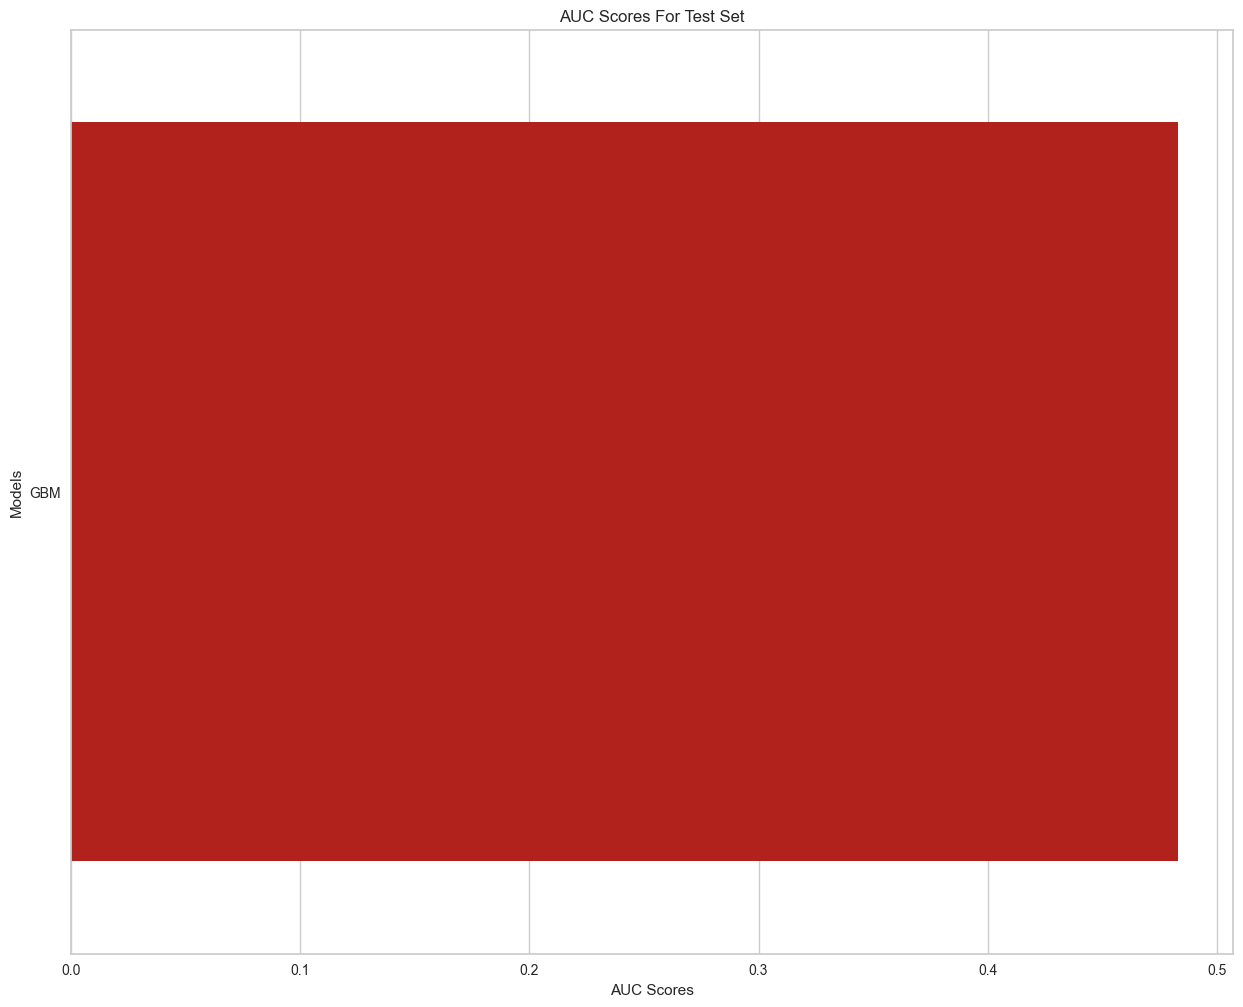

In [37]:
# LogisticRegression with make_pipeline
GBMreg = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
evaluate_classification_model_holdout([('GBM', GBMreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(GBMreg)
plot_results(GBMreg)
# report_results_quickly(GBMreg)
plot_learning_curve(GBMreg)

In [ ]:
# LogisticRegression with make_pipeline
ABreg = make_pipeline(MinMaxScaler(), AdaBoostClassifier())
evaluate_classification_model_holdout([('AB', ABreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ABreg)
plot_results(ABreg)
# report_results_quickly(ABreg)
plot_learning_curve(ABreg)

In [ ]:
# LogisticRegression with make_pipeline
ngbreg = make_pipeline(MinMaxScaler(), NGBClassifier(verbose=False))
evaluate_classification_model_holdout([('NGBClassifier', ngbreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ngbreg)
# plot_results(ngbreg)
# report_results_quickly(ngbreg)
# plot_learning_curve(ngbreg)

In [ ]:
# KNN with make_pipeline
knn = make_pipeline(RobustScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', knn)]) # 0.857 instead of 0.850649

In [ ]:
# plot_feature_importances(knn)
plot_results(knn)
# report_results_quickly(knn)
plot_learning_curve(knn)

In [ ]:
# SVC with make_pipeline
svc = make_pipeline(RobustScaler(), SVC())
evaluate_classification_model_holdout([('SVM', svc)]) # 0.864 instead of 0.837662

In [ ]:
# plot_feature_importances(svc)
plot_results(svc)
# report_results_quickly(svc)
plot_learning_curve(svc)

In [ ]:
# ANN with make_pipeline
ann = make_pipeline(StandardScaler(), MLPClassifier())
evaluate_classification_model_holdout([('ANN', ann)]) # 0.857 instead of 0.850649

In [32]:
# MODEL TUNING

'''
Models to be tuned:
    - LogisticRegression
    - RandomForestClassifier
    -SVM
    - LightGBMClassifier
    - XGBClassifier
'''

# LogisticRegression # 0.805195

logreg_model = LogisticRegression(random_state=42)
logreg_params = {'penalty': ['l1', 'l2'],
                 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
logreg_cv_model = GridSearchCV(logreg_model, logreg_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
logreg_cv_model.best_params_ # {'C': 1, 'penalty': 'l2'}

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    %

{'C': 1, 'penalty': 'l2'}

In [33]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.48863636363636365

In [34]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-LR-RFFI', Save_format = 'csv',Save_type = 'col')

In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-LR-RFFI.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.57      0.73      0.64        33
EGFR Mutated       0.40      0.25      0.31        24

    accuracy                           0.53        57
   macro avg       0.49      0.49      0.47        57
weighted avg       0.50      0.53      0.50        57

precision 0.4 accuracy 0.5263157894736842 recall 0.25 auc 0.48863636363636365


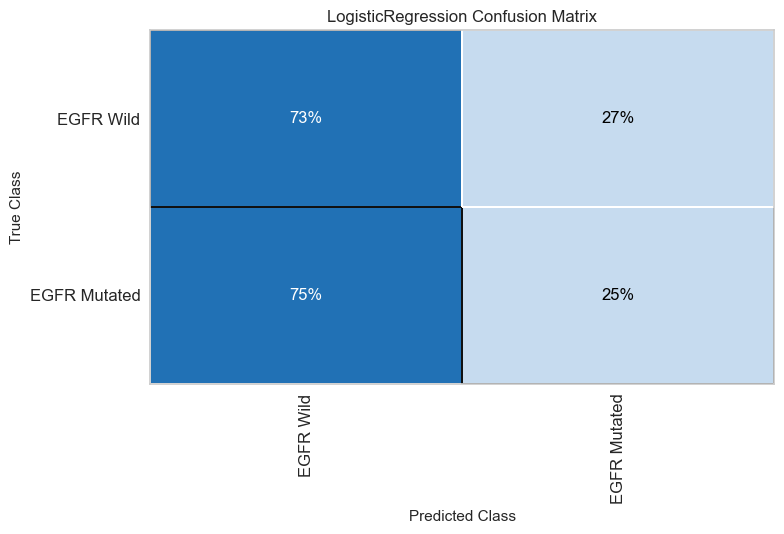

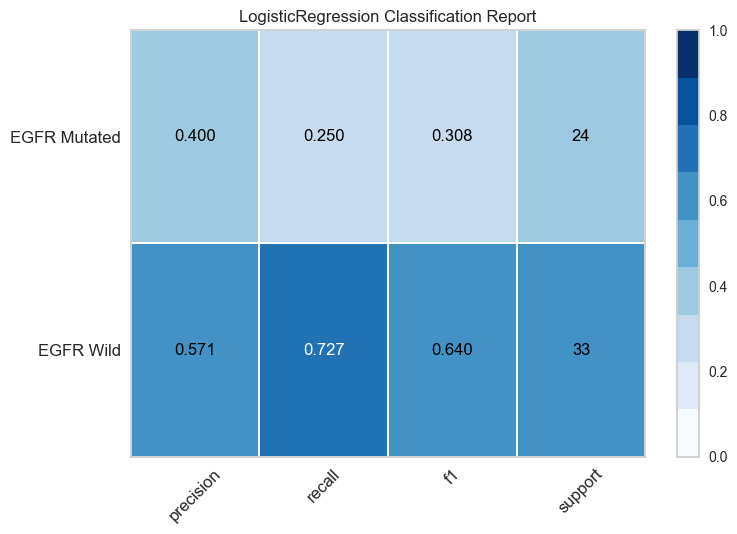

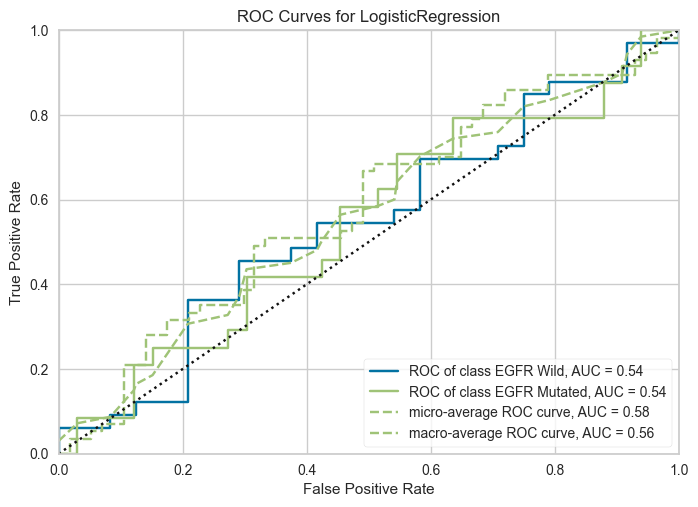

NameError: name 'X' is not defined

In [36]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [37]:
# RandomForestClassifier # 0.876623

rf_model = RandomForestClassifier(random_state=42)
rf_params = {"n_estimators": [500, 800,1000,2000,3000,5000],
             "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
             "max_depth": [1,2,3,4, 5, 8, None]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
rf_cv_model.best_params_ # {'max_depth': None, 'min_samples_split': 7, 'n_estimators': 200}

Fitting 10 folds for each of 378 candidates, totalling 3780 fits


{'max_depth': None, 'min_samples_split': 8, 'n_estimators': 500}

In [38]:
rf_cv_model.best_params_   #0.6425000000000001   {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 10}

{'max_depth': None, 'min_samples_split': 8, 'n_estimators': 500}

In [39]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.5814393939393939

In [40]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RFFI-RF73', Save_format = 'csv',Save_type = 'col')

In [41]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RFFI-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.63      0.79      0.70        33
EGFR Mutated       0.56      0.38      0.45        24

    accuracy                           0.61        57
   macro avg       0.60      0.58      0.58        57
weighted avg       0.60      0.61      0.60        57

precision 0.5625 accuracy 0.6140350877192983 recall 0.375 auc 0.5814393939393939


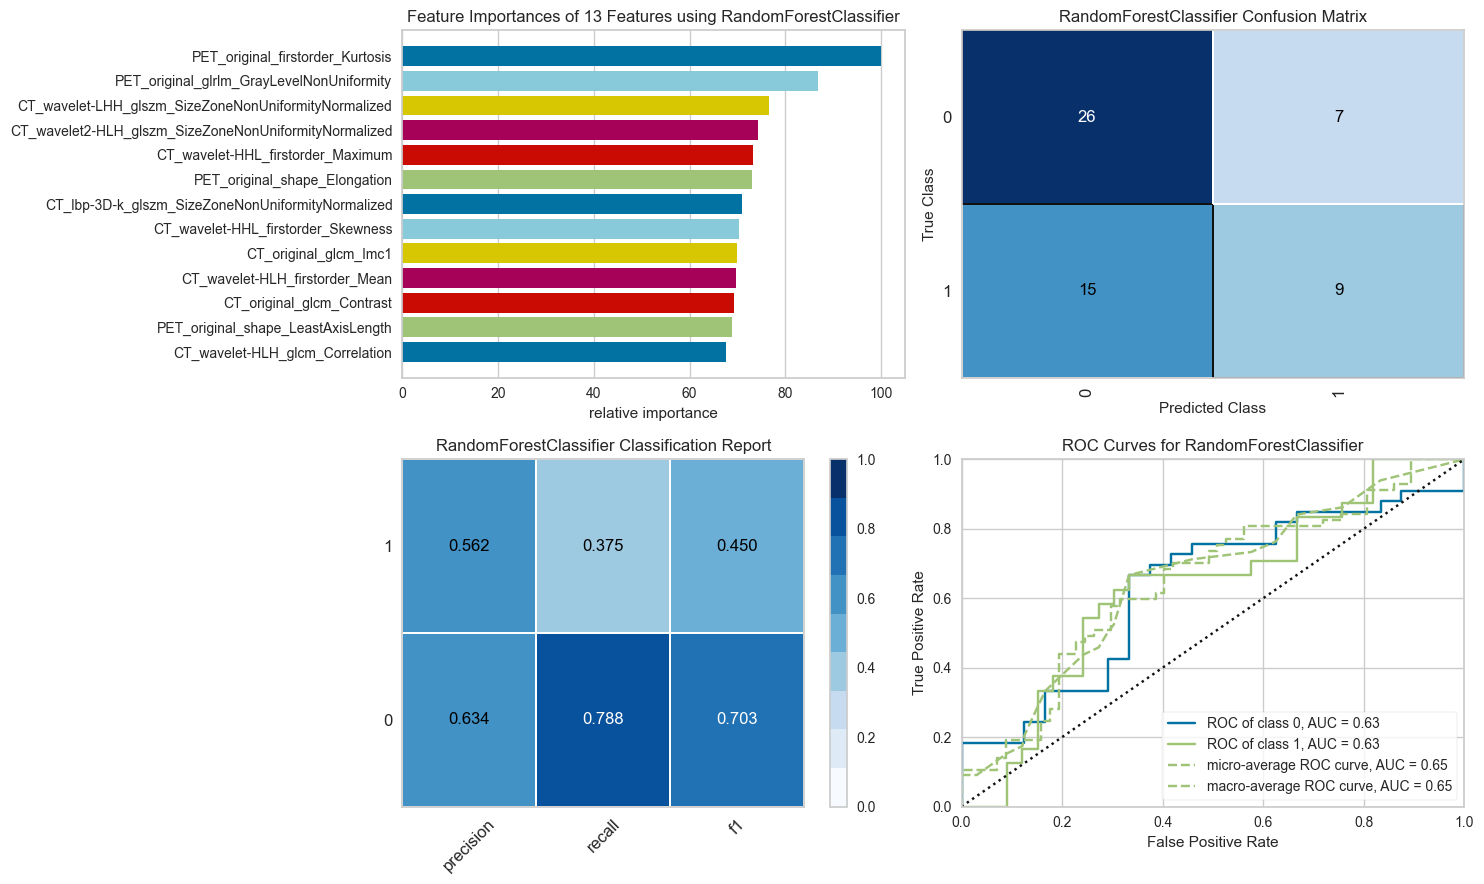

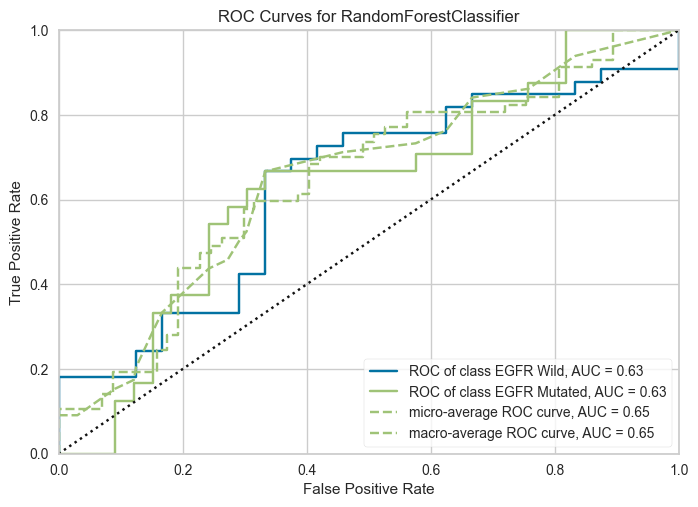

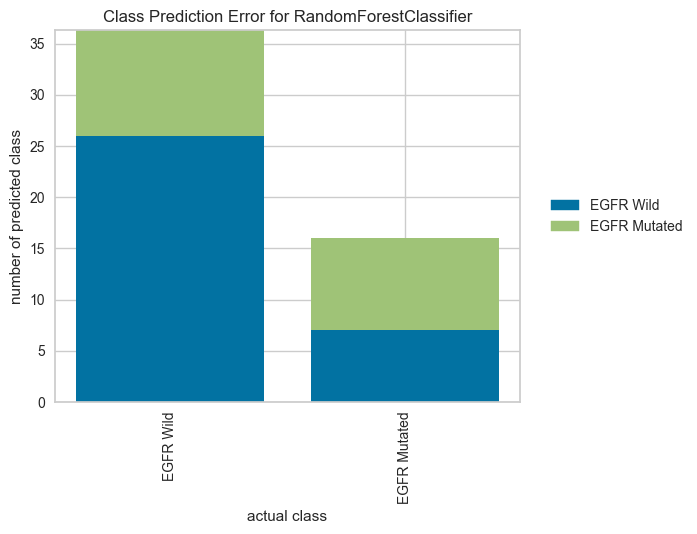

NameError: name 'X' is not defined

In [42]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [49]:
# CatBoostClassifier # 0.883117

from yellowbrick.contrib.wrapper import wrap
cb_model = CatBoostClassifier()
                                        
cb_params = {
#     'depth': [1,2,3,4, 6, 10],
          'learning_rate' : [0.01,0.03,0.05,0.15,0.1,0.3],
#          'l2_leaf_reg': [1,4,9],
         'iterations': [200,300,500,800,1200,2000],
          'early_stopping_rounds':[2000,3000],
#              'subsample':[0.5,1.0],
             'max_depth':[1,3,5,6,8,10, None]
#              'n_estimators':[1000,3000,5000] 
#           'task_type':['GPU'],
#           'loss_function':['Binary'],
          
         }
# {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5000, 'subsample': 0.5}

cb_cv_model = GridSearchCV(cb_model, cb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
cb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}


Fitting 10 folds for each of 504 candidates, totalling 5040 fits
0:	learn: 0.6879982	total: 1.59ms	remaining: 3.17s
1:	learn: 0.6819761	total: 3.18ms	remaining: 3.18s
2:	learn: 0.6768594	total: 5.2ms	remaining: 3.46s
3:	learn: 0.6738625	total: 6.68ms	remaining: 3.33s
4:	learn: 0.6693151	total: 7.62ms	remaining: 3.04s
5:	learn: 0.6653148	total: 9.95ms	remaining: 3.31s
6:	learn: 0.6630758	total: 11.9ms	remaining: 3.38s
7:	learn: 0.6605591	total: 13.4ms	remaining: 3.33s
8:	learn: 0.6577661	total: 14.7ms	remaining: 3.25s
9:	learn: 0.6537240	total: 15.7ms	remaining: 3.13s
10:	learn: 0.6494823	total: 16.8ms	remaining: 3.04s
11:	learn: 0.6460676	total: 18.3ms	remaining: 3.03s
12:	learn: 0.6427749	total: 19.9ms	remaining: 3.05s
13:	learn: 0.6395043	total: 21.3ms	remaining: 3.02s
14:	learn: 0.6361393	total: 22.8ms	remaining: 3.02s
15:	learn: 0.6326914	total: 24.6ms	remaining: 3.06s
16:	learn: 0.6288833	total: 26.4ms	remaining: 3.07s
17:	learn: 0.6254812	total: 27.5ms	remaining: 3.03s
18:	learn:

227:	learn: 0.3315180	total: 335ms	remaining: 2.6s
228:	learn: 0.3308074	total: 336ms	remaining: 2.6s
229:	learn: 0.3297012	total: 337ms	remaining: 2.6s
230:	learn: 0.3284195	total: 338ms	remaining: 2.59s
231:	learn: 0.3271339	total: 340ms	remaining: 2.59s
232:	learn: 0.3254751	total: 341ms	remaining: 2.59s
233:	learn: 0.3244256	total: 343ms	remaining: 2.59s
234:	learn: 0.3236397	total: 345ms	remaining: 2.59s
235:	learn: 0.3231351	total: 346ms	remaining: 2.59s
236:	learn: 0.3223143	total: 348ms	remaining: 2.58s
237:	learn: 0.3211449	total: 349ms	remaining: 2.58s
238:	learn: 0.3201273	total: 350ms	remaining: 2.58s
239:	learn: 0.3190584	total: 351ms	remaining: 2.58s
240:	learn: 0.3182332	total: 353ms	remaining: 2.57s
241:	learn: 0.3170799	total: 354ms	remaining: 2.57s
242:	learn: 0.3163472	total: 356ms	remaining: 2.57s
243:	learn: 0.3139741	total: 357ms	remaining: 2.57s
244:	learn: 0.3130511	total: 359ms	remaining: 2.57s
245:	learn: 0.3125595	total: 360ms	remaining: 2.57s
246:	learn: 0.3

460:	learn: 0.1619457	total: 666ms	remaining: 2.22s
461:	learn: 0.1614737	total: 667ms	remaining: 2.22s
462:	learn: 0.1609036	total: 669ms	remaining: 2.22s
463:	learn: 0.1605502	total: 670ms	remaining: 2.22s
464:	learn: 0.1599645	total: 671ms	remaining: 2.21s
465:	learn: 0.1595181	total: 672ms	remaining: 2.21s
466:	learn: 0.1587415	total: 673ms	remaining: 2.21s
467:	learn: 0.1584605	total: 675ms	remaining: 2.21s
468:	learn: 0.1583556	total: 676ms	remaining: 2.21s
469:	learn: 0.1578499	total: 677ms	remaining: 2.2s
470:	learn: 0.1574966	total: 682ms	remaining: 2.21s
471:	learn: 0.1570409	total: 683ms	remaining: 2.21s
472:	learn: 0.1565672	total: 685ms	remaining: 2.21s
473:	learn: 0.1560830	total: 691ms	remaining: 2.23s
474:	learn: 0.1555957	total: 693ms	remaining: 2.23s
475:	learn: 0.1551114	total: 696ms	remaining: 2.23s
476:	learn: 0.1545229	total: 697ms	remaining: 2.23s
477:	learn: 0.1541372	total: 700ms	remaining: 2.23s
478:	learn: 0.1535243	total: 701ms	remaining: 2.23s
479:	learn: 0

675:	learn: 0.0912636	total: 1.01s	remaining: 1.97s
676:	learn: 0.0911398	total: 1.01s	remaining: 1.97s
677:	learn: 0.0909174	total: 1.01s	remaining: 1.97s
678:	learn: 0.0906321	total: 1.01s	remaining: 1.97s
679:	learn: 0.0904274	total: 1.01s	remaining: 1.97s
680:	learn: 0.0903174	total: 1.02s	remaining: 1.97s
681:	learn: 0.0899496	total: 1.02s	remaining: 1.97s
682:	learn: 0.0895172	total: 1.02s	remaining: 1.97s
683:	learn: 0.0892417	total: 1.02s	remaining: 1.96s
684:	learn: 0.0888604	total: 1.02s	remaining: 1.96s
685:	learn: 0.0886655	total: 1.02s	remaining: 1.96s
686:	learn: 0.0884338	total: 1.02s	remaining: 1.96s
687:	learn: 0.0882589	total: 1.03s	remaining: 1.96s
688:	learn: 0.0880578	total: 1.03s	remaining: 1.96s
689:	learn: 0.0878827	total: 1.03s	remaining: 1.95s
690:	learn: 0.0875693	total: 1.03s	remaining: 1.95s
691:	learn: 0.0873029	total: 1.03s	remaining: 1.95s
692:	learn: 0.0870477	total: 1.03s	remaining: 1.95s
693:	learn: 0.0868601	total: 1.03s	remaining: 1.95s
694:	learn: 

909:	learn: 0.0546038	total: 1.35s	remaining: 1.61s
910:	learn: 0.0545953	total: 1.35s	remaining: 1.61s
911:	learn: 0.0544835	total: 1.35s	remaining: 1.61s
912:	learn: 0.0543248	total: 1.35s	remaining: 1.61s
913:	learn: 0.0542061	total: 1.35s	remaining: 1.61s
914:	learn: 0.0541176	total: 1.35s	remaining: 1.6s
915:	learn: 0.0541088	total: 1.35s	remaining: 1.6s
916:	learn: 0.0540292	total: 1.36s	remaining: 1.6s
917:	learn: 0.0539525	total: 1.36s	remaining: 1.6s
918:	learn: 0.0538359	total: 1.36s	remaining: 1.6s
919:	learn: 0.0537312	total: 1.36s	remaining: 1.6s
920:	learn: 0.0537168	total: 1.36s	remaining: 1.59s
921:	learn: 0.0535752	total: 1.36s	remaining: 1.59s
922:	learn: 0.0535439	total: 1.36s	remaining: 1.59s
923:	learn: 0.0534035	total: 1.36s	remaining: 1.59s
924:	learn: 0.0532137	total: 1.36s	remaining: 1.59s
925:	learn: 0.0531965	total: 1.37s	remaining: 1.59s
926:	learn: 0.0530724	total: 1.37s	remaining: 1.59s
927:	learn: 0.0529186	total: 1.37s	remaining: 1.58s
928:	learn: 0.0529

1145:	learn: 0.0360243	total: 1.68s	remaining: 1.25s
1146:	learn: 0.0359337	total: 1.69s	remaining: 1.25s
1147:	learn: 0.0358900	total: 1.69s	remaining: 1.25s
1148:	learn: 0.0358472	total: 1.69s	remaining: 1.25s
1149:	learn: 0.0357848	total: 1.69s	remaining: 1.25s
1150:	learn: 0.0357807	total: 1.69s	remaining: 1.25s
1151:	learn: 0.0357400	total: 1.69s	remaining: 1.24s
1152:	learn: 0.0356876	total: 1.69s	remaining: 1.24s
1153:	learn: 0.0356034	total: 1.69s	remaining: 1.24s
1154:	learn: 0.0355187	total: 1.69s	remaining: 1.24s
1155:	learn: 0.0353900	total: 1.7s	remaining: 1.24s
1156:	learn: 0.0353736	total: 1.7s	remaining: 1.24s
1157:	learn: 0.0352673	total: 1.7s	remaining: 1.23s
1158:	learn: 0.0351823	total: 1.7s	remaining: 1.23s
1159:	learn: 0.0351421	total: 1.7s	remaining: 1.23s
1160:	learn: 0.0351354	total: 1.7s	remaining: 1.23s
1161:	learn: 0.0350631	total: 1.7s	remaining: 1.23s
1162:	learn: 0.0349965	total: 1.71s	remaining: 1.23s
1163:	learn: 0.0349927	total: 1.71s	remaining: 1.23s


1361:	learn: 0.0258796	total: 2.02s	remaining: 947ms
1362:	learn: 0.0258507	total: 2.02s	remaining: 945ms
1363:	learn: 0.0258208	total: 2.02s	remaining: 944ms
1364:	learn: 0.0257608	total: 2.02s	remaining: 942ms
1365:	learn: 0.0256936	total: 2.03s	remaining: 941ms
1366:	learn: 0.0256426	total: 2.03s	remaining: 939ms
1367:	learn: 0.0256347	total: 2.03s	remaining: 938ms
1368:	learn: 0.0256332	total: 2.03s	remaining: 936ms
1369:	learn: 0.0255867	total: 2.03s	remaining: 934ms
1370:	learn: 0.0255635	total: 2.03s	remaining: 933ms
1371:	learn: 0.0255319	total: 2.03s	remaining: 931ms
1372:	learn: 0.0255107	total: 2.04s	remaining: 930ms
1373:	learn: 0.0254528	total: 2.04s	remaining: 928ms
1374:	learn: 0.0254127	total: 2.04s	remaining: 927ms
1375:	learn: 0.0253735	total: 2.04s	remaining: 926ms
1376:	learn: 0.0253711	total: 2.04s	remaining: 924ms
1377:	learn: 0.0253509	total: 2.05s	remaining: 924ms
1378:	learn: 0.0253267	total: 2.05s	remaining: 922ms
1379:	learn: 0.0253250	total: 2.05s	remaining:

1590:	learn: 0.0194925	total: 2.36s	remaining: 607ms
1591:	learn: 0.0194692	total: 2.36s	remaining: 605ms
1592:	learn: 0.0194225	total: 2.36s	remaining: 604ms
1593:	learn: 0.0194001	total: 2.36s	remaining: 602ms
1594:	learn: 0.0193729	total: 2.37s	remaining: 601ms
1595:	learn: 0.0193407	total: 2.37s	remaining: 599ms
1596:	learn: 0.0193238	total: 2.37s	remaining: 598ms
1597:	learn: 0.0193202	total: 2.37s	remaining: 596ms
1598:	learn: 0.0192918	total: 2.37s	remaining: 595ms
1599:	learn: 0.0192908	total: 2.37s	remaining: 593ms
1600:	learn: 0.0192585	total: 2.37s	remaining: 592ms
1601:	learn: 0.0192575	total: 2.38s	remaining: 590ms
1602:	learn: 0.0192320	total: 2.38s	remaining: 589ms
1603:	learn: 0.0192152	total: 2.38s	remaining: 587ms
1604:	learn: 0.0192129	total: 2.38s	remaining: 586ms
1605:	learn: 0.0192068	total: 2.38s	remaining: 585ms
1606:	learn: 0.0191782	total: 2.38s	remaining: 583ms
1607:	learn: 0.0191460	total: 2.39s	remaining: 582ms
1608:	learn: 0.0191283	total: 2.39s	remaining:

1823:	learn: 0.0151649	total: 2.7s	remaining: 260ms
1824:	learn: 0.0151530	total: 2.7s	remaining: 259ms
1825:	learn: 0.0151294	total: 2.7s	remaining: 257ms
1826:	learn: 0.0151254	total: 2.7s	remaining: 256ms
1827:	learn: 0.0151237	total: 2.71s	remaining: 255ms
1828:	learn: 0.0150899	total: 2.71s	remaining: 253ms
1829:	learn: 0.0150739	total: 2.71s	remaining: 252ms
1830:	learn: 0.0150625	total: 2.71s	remaining: 250ms
1831:	learn: 0.0150447	total: 2.71s	remaining: 249ms
1832:	learn: 0.0150207	total: 2.71s	remaining: 247ms
1833:	learn: 0.0149913	total: 2.72s	remaining: 246ms
1834:	learn: 0.0149913	total: 2.72s	remaining: 244ms
1835:	learn: 0.0149817	total: 2.72s	remaining: 243ms
1836:	learn: 0.0149817	total: 2.72s	remaining: 241ms
1837:	learn: 0.0149595	total: 2.72s	remaining: 240ms
1838:	learn: 0.0149473	total: 2.72s	remaining: 238ms
1839:	learn: 0.0149299	total: 2.72s	remaining: 237ms
1840:	learn: 0.0149000	total: 2.72s	remaining: 235ms
1841:	learn: 0.0149000	total: 2.72s	remaining: 234

{'early_stopping_rounds': 2000,
 'iterations': 2000,
 'learning_rate': 0.03,
 'max_depth': 3}

In [50]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6879982	total: 7.02ms	remaining: 14s
1:	learn: 0.6819761	total: 7.6ms	remaining: 7.59s
2:	learn: 0.6768594	total: 8.23ms	remaining: 5.48s
3:	learn: 0.6738625	total: 8.93ms	remaining: 4.46s
4:	learn: 0.6693151	total: 9.52ms	remaining: 3.8s
5:	learn: 0.6653148	total: 10.1ms	remaining: 3.37s
6:	learn: 0.6630758	total: 10.7ms	remaining: 3.04s
7:	learn: 0.6605591	total: 11.2ms	remaining: 2.78s
8:	learn: 0.6577661	total: 11.6ms	remaining: 2.57s
9:	learn: 0.6537240	total: 12.1ms	remaining: 2.41s
10:	learn: 0.6494823	total: 12.5ms	remaining: 2.27s
11:	learn: 0.6460676	total: 13ms	remaining: 2.15s
12:	learn: 0.6427749	total: 13.5ms	remaining: 2.06s
13:	learn: 0.6395043	total: 13.9ms	remaining: 1.97s
14:	learn: 0.6361393	total: 14.4ms	remaining: 1.9s
15:	learn: 0.6326914	total: 14.8ms	remaining: 1.84s
16:	learn: 0.6288833	total: 15.3ms	remaining: 1.78s
17:	learn: 0.6254812	total: 15.8ms	remaining: 1.74s
18:	learn: 0.6232066	total: 16.2ms	remaining: 1.69s
19:	learn: 0.6181954	total: 1

320:	learn: 0.2438010	total: 163ms	remaining: 851ms
321:	learn: 0.2435288	total: 163ms	remaining: 851ms
322:	learn: 0.2426276	total: 164ms	remaining: 850ms
323:	learn: 0.2415895	total: 164ms	remaining: 850ms
324:	learn: 0.2410280	total: 165ms	remaining: 849ms
325:	learn: 0.2401753	total: 165ms	remaining: 849ms
326:	learn: 0.2397929	total: 166ms	remaining: 848ms
327:	learn: 0.2395735	total: 166ms	remaining: 848ms
328:	learn: 0.2389689	total: 167ms	remaining: 847ms
329:	learn: 0.2386251	total: 167ms	remaining: 847ms
330:	learn: 0.2374503	total: 168ms	remaining: 846ms
331:	learn: 0.2364877	total: 168ms	remaining: 846ms
332:	learn: 0.2360176	total: 169ms	remaining: 845ms
333:	learn: 0.2346120	total: 169ms	remaining: 845ms
334:	learn: 0.2340538	total: 170ms	remaining: 845ms
335:	learn: 0.2332486	total: 171ms	remaining: 845ms
336:	learn: 0.2322027	total: 171ms	remaining: 845ms
337:	learn: 0.2314119	total: 172ms	remaining: 844ms
338:	learn: 0.2309731	total: 172ms	remaining: 844ms
339:	learn: 

641:	learn: 0.0991529	total: 322ms	remaining: 680ms
642:	learn: 0.0989915	total: 322ms	remaining: 680ms
643:	learn: 0.0987935	total: 323ms	remaining: 679ms
644:	learn: 0.0985748	total: 323ms	remaining: 679ms
645:	learn: 0.0984741	total: 324ms	remaining: 678ms
646:	learn: 0.0980681	total: 324ms	remaining: 678ms
647:	learn: 0.0978215	total: 325ms	remaining: 677ms
648:	learn: 0.0975729	total: 325ms	remaining: 677ms
649:	learn: 0.0974621	total: 326ms	remaining: 676ms
650:	learn: 0.0969867	total: 326ms	remaining: 676ms
651:	learn: 0.0967762	total: 327ms	remaining: 675ms
652:	learn: 0.0964813	total: 327ms	remaining: 675ms
653:	learn: 0.0960638	total: 328ms	remaining: 674ms
654:	learn: 0.0960411	total: 328ms	remaining: 674ms
655:	learn: 0.0959223	total: 329ms	remaining: 674ms
656:	learn: 0.0957543	total: 329ms	remaining: 673ms
657:	learn: 0.0954959	total: 330ms	remaining: 672ms
658:	learn: 0.0952608	total: 330ms	remaining: 672ms
659:	learn: 0.0950349	total: 331ms	remaining: 671ms
660:	learn: 

972:	learn: 0.0487452	total: 480ms	remaining: 506ms
973:	learn: 0.0486132	total: 480ms	remaining: 506ms
974:	learn: 0.0484852	total: 481ms	remaining: 505ms
975:	learn: 0.0483500	total: 481ms	remaining: 505ms
976:	learn: 0.0482781	total: 482ms	remaining: 504ms
977:	learn: 0.0481457	total: 482ms	remaining: 504ms
978:	learn: 0.0480312	total: 483ms	remaining: 503ms
979:	learn: 0.0480093	total: 483ms	remaining: 503ms
980:	learn: 0.0478807	total: 483ms	remaining: 502ms
981:	learn: 0.0477896	total: 484ms	remaining: 502ms
982:	learn: 0.0477216	total: 484ms	remaining: 501ms
983:	learn: 0.0475779	total: 485ms	remaining: 501ms
984:	learn: 0.0473826	total: 485ms	remaining: 500ms
985:	learn: 0.0471984	total: 486ms	remaining: 500ms
986:	learn: 0.0470853	total: 486ms	remaining: 499ms
987:	learn: 0.0470781	total: 487ms	remaining: 499ms
988:	learn: 0.0470232	total: 487ms	remaining: 498ms
989:	learn: 0.0469315	total: 488ms	remaining: 498ms
990:	learn: 0.0468939	total: 488ms	remaining: 497ms
991:	learn: 

1298:	learn: 0.0283492	total: 640ms	remaining: 345ms
1299:	learn: 0.0283472	total: 640ms	remaining: 345ms
1300:	learn: 0.0283178	total: 641ms	remaining: 344ms
1301:	learn: 0.0282892	total: 641ms	remaining: 344ms
1302:	learn: 0.0282572	total: 642ms	remaining: 343ms
1303:	learn: 0.0282253	total: 642ms	remaining: 343ms
1304:	learn: 0.0281657	total: 643ms	remaining: 342ms
1305:	learn: 0.0281136	total: 643ms	remaining: 342ms
1306:	learn: 0.0281091	total: 644ms	remaining: 341ms
1307:	learn: 0.0280600	total: 644ms	remaining: 341ms
1308:	learn: 0.0280197	total: 645ms	remaining: 340ms
1309:	learn: 0.0279891	total: 645ms	remaining: 340ms
1310:	learn: 0.0279482	total: 646ms	remaining: 339ms
1311:	learn: 0.0279065	total: 646ms	remaining: 339ms
1312:	learn: 0.0278602	total: 647ms	remaining: 339ms
1313:	learn: 0.0278572	total: 648ms	remaining: 338ms
1314:	learn: 0.0278010	total: 648ms	remaining: 338ms
1315:	learn: 0.0277495	total: 649ms	remaining: 337ms
1316:	learn: 0.0277369	total: 649ms	remaining:

1629:	learn: 0.0187093	total: 798ms	remaining: 181ms
1630:	learn: 0.0186894	total: 798ms	remaining: 181ms
1631:	learn: 0.0186558	total: 799ms	remaining: 180ms
1632:	learn: 0.0186334	total: 799ms	remaining: 180ms
1633:	learn: 0.0185952	total: 800ms	remaining: 179ms
1634:	learn: 0.0185828	total: 801ms	remaining: 179ms
1635:	learn: 0.0185599	total: 801ms	remaining: 178ms
1636:	learn: 0.0185451	total: 802ms	remaining: 178ms
1637:	learn: 0.0185204	total: 802ms	remaining: 177ms
1638:	learn: 0.0185019	total: 803ms	remaining: 177ms
1639:	learn: 0.0184835	total: 803ms	remaining: 176ms
1640:	learn: 0.0184619	total: 804ms	remaining: 176ms
1641:	learn: 0.0184299	total: 804ms	remaining: 175ms
1642:	learn: 0.0184291	total: 805ms	remaining: 175ms
1643:	learn: 0.0184130	total: 806ms	remaining: 174ms
1644:	learn: 0.0184130	total: 806ms	remaining: 174ms
1645:	learn: 0.0184016	total: 807ms	remaining: 174ms
1646:	learn: 0.0183787	total: 807ms	remaining: 173ms
1647:	learn: 0.0183587	total: 808ms	remaining:

1932:	learn: 0.0137659	total: 959ms	remaining: 33.2ms
1933:	learn: 0.0137534	total: 959ms	remaining: 32.7ms
1934:	learn: 0.0137442	total: 960ms	remaining: 32.2ms
1935:	learn: 0.0137364	total: 960ms	remaining: 31.7ms
1936:	learn: 0.0137341	total: 961ms	remaining: 31.3ms
1937:	learn: 0.0137232	total: 961ms	remaining: 30.8ms
1938:	learn: 0.0137087	total: 962ms	remaining: 30.3ms
1939:	learn: 0.0136946	total: 962ms	remaining: 29.8ms
1940:	learn: 0.0136785	total: 963ms	remaining: 29.3ms
1941:	learn: 0.0136583	total: 963ms	remaining: 28.8ms
1942:	learn: 0.0136431	total: 964ms	remaining: 28.3ms
1943:	learn: 0.0136306	total: 964ms	remaining: 27.8ms
1944:	learn: 0.0136102	total: 965ms	remaining: 27.3ms
1945:	learn: 0.0136035	total: 965ms	remaining: 26.8ms
1946:	learn: 0.0135917	total: 966ms	remaining: 26.3ms
1947:	learn: 0.0135825	total: 966ms	remaining: 25.8ms
1948:	learn: 0.0135827	total: 967ms	remaining: 25.3ms
1949:	learn: 0.0135595	total: 967ms	remaining: 24.8ms
1950:	learn: 0.0135405	total

0.6491228070175439

In [51]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [52]:
# shap.dependence_plot(y_train, shap_values, X_train)

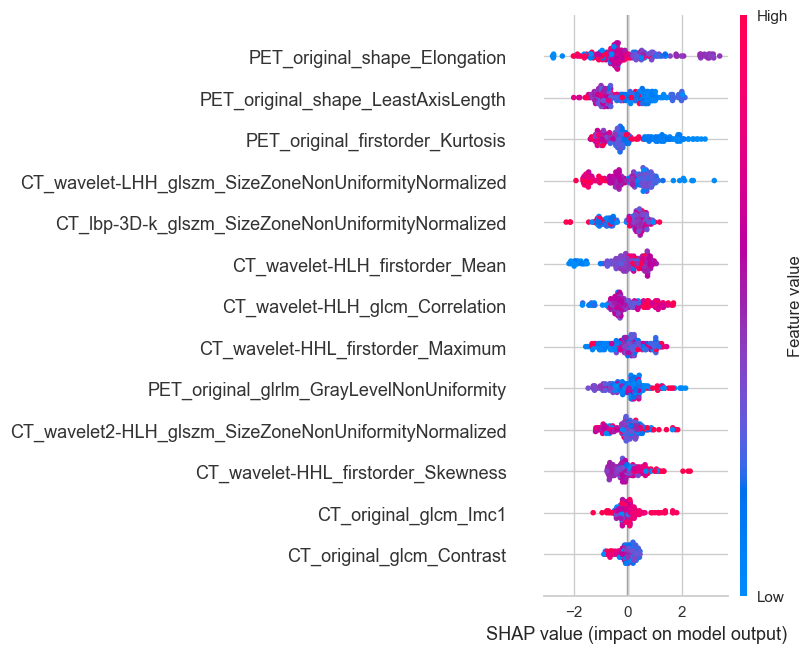

In [53]:

shap.summary_plot(shap_values, X_train)

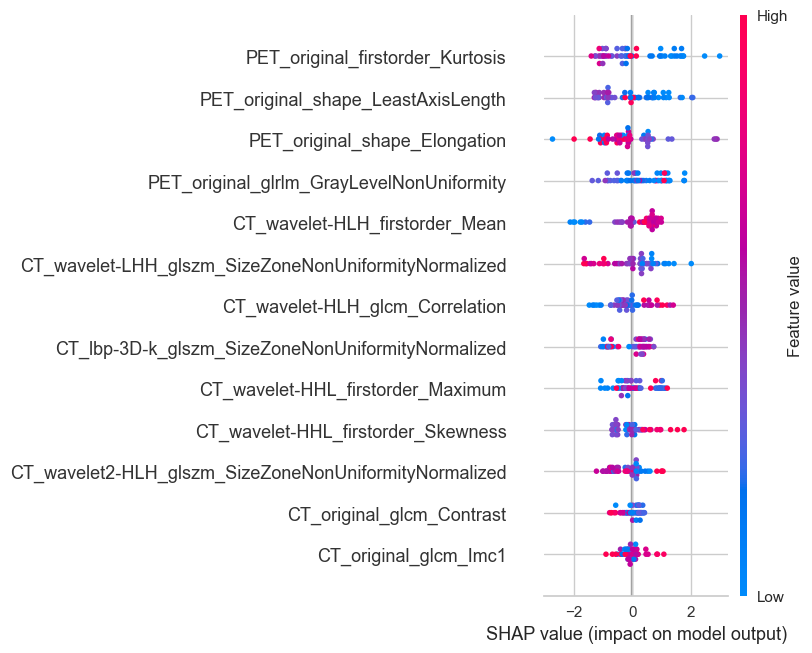

In [54]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [55]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [56]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--RFFI-CBC73', Save_format = 'csv',Save_type = 'col')

In [57]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--RFFI-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.67      0.79      0.72        33
EGFR Mutated       0.61      0.46      0.52        24

    accuracy                           0.65        57
   macro avg       0.64      0.62      0.62        57
weighted avg       0.64      0.65      0.64        57

precision 0.6111111111111112 accuracy 0.6491228070175439 recall 0.4583333333333333 auc 0.6231060606060606


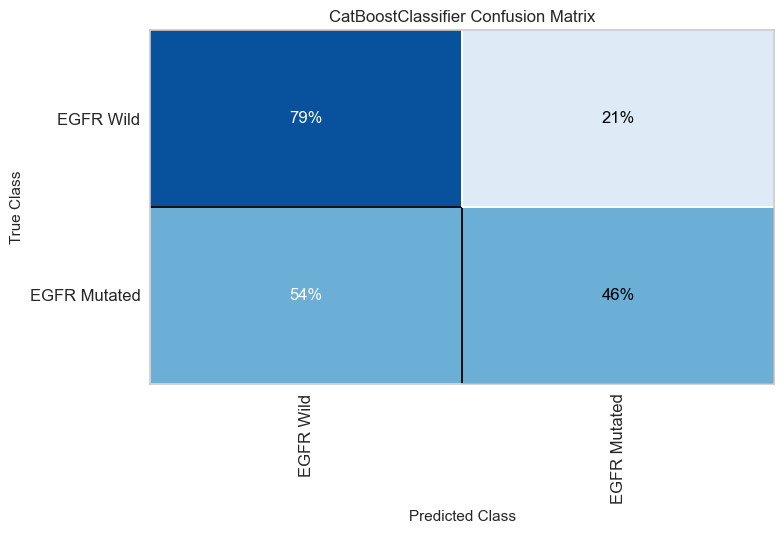

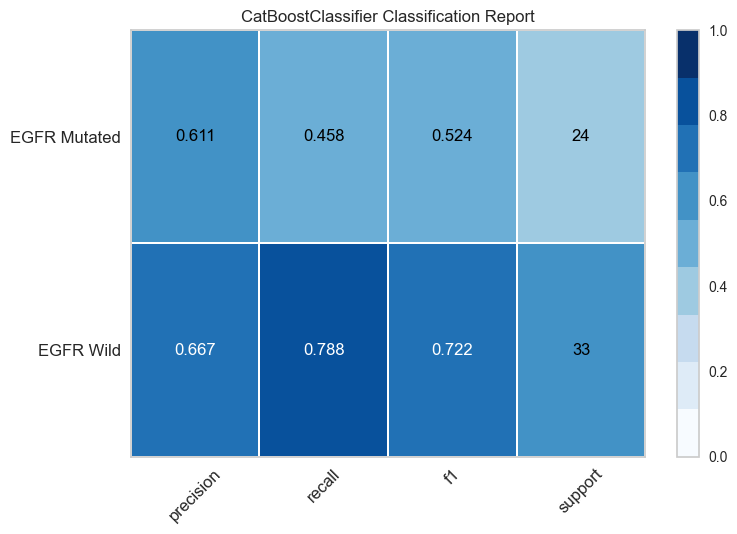

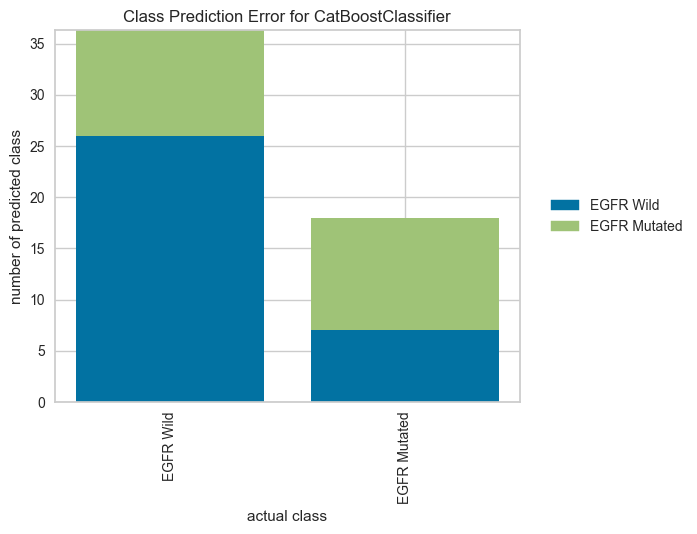

NameError: name 'X' is not defined

In [58]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [59]:
# # AdaBoostClassifier # 0.883117

adb_model = AdaBoostClassifier()
adb_params = {"learning_rate": [0.001, 0.01,0.1, 0.2, 0.5],              
#               "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [200,500,800,1000,2000,3000,5000]#,2000,3000,5000,10000
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

adb_cv_model = GridSearchCV(adb_model, adb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
adb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 35 candidates, totalling 350 fits


{'learning_rate': 0.01, 'n_estimators': 500}

In [60]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.5964912280701754

In [61]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--RFFI-ADB73', Save_format = 'csv',Save_type = 'col')

In [62]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--RFFI-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.63      0.73      0.68        33
    EGFR E21       0.53      0.42      0.47        24

    accuracy                           0.60        57
   macro avg       0.58      0.57      0.57        57
weighted avg       0.59      0.60      0.59        57

precision 0.5263157894736842 accuracy 0.5964912280701754 recall 0.4166666666666667 auc 0.5719696969696969


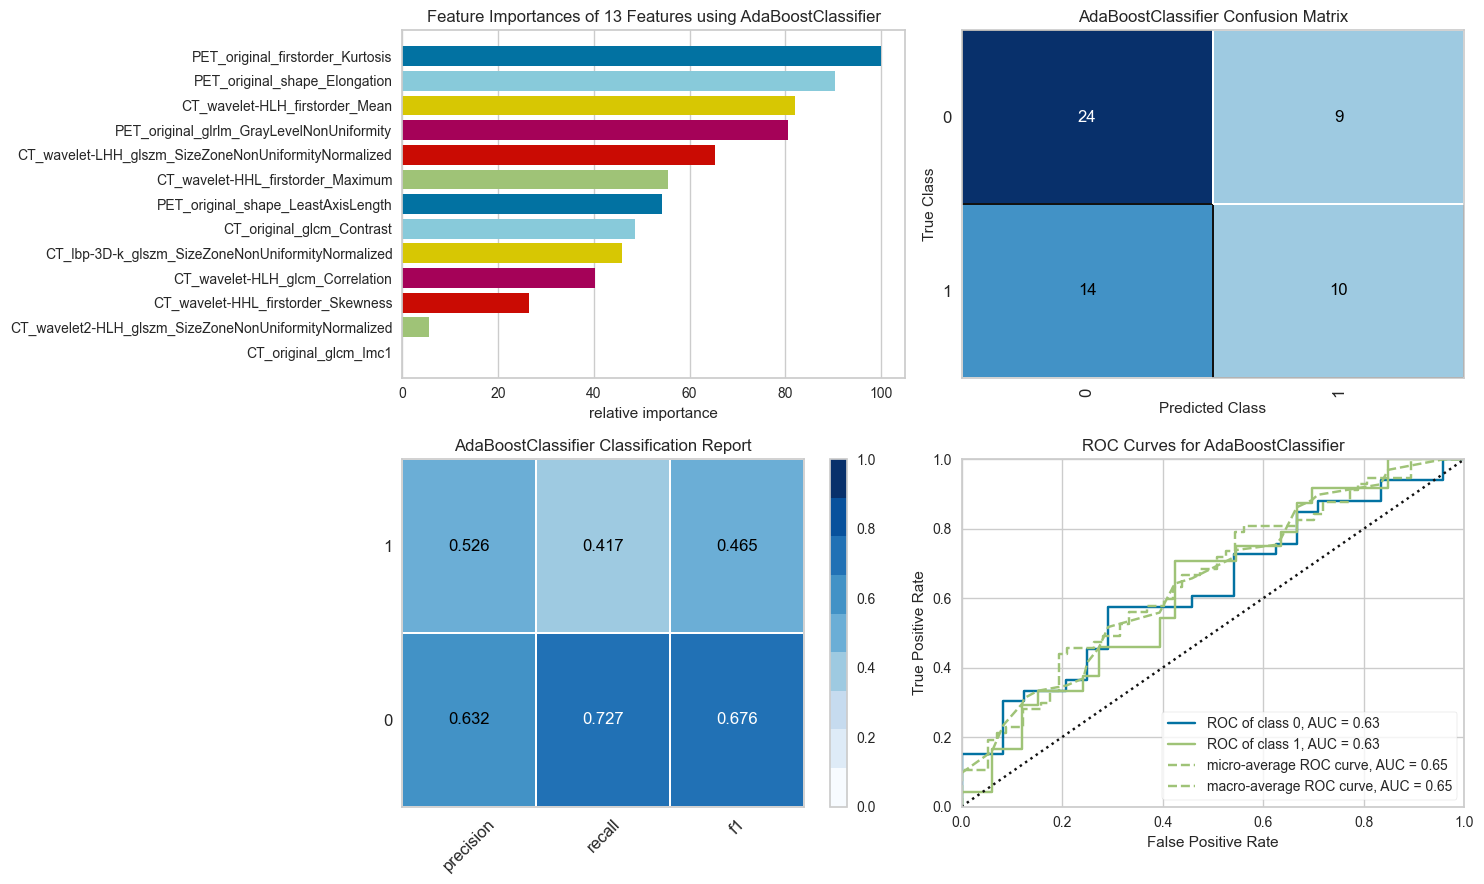

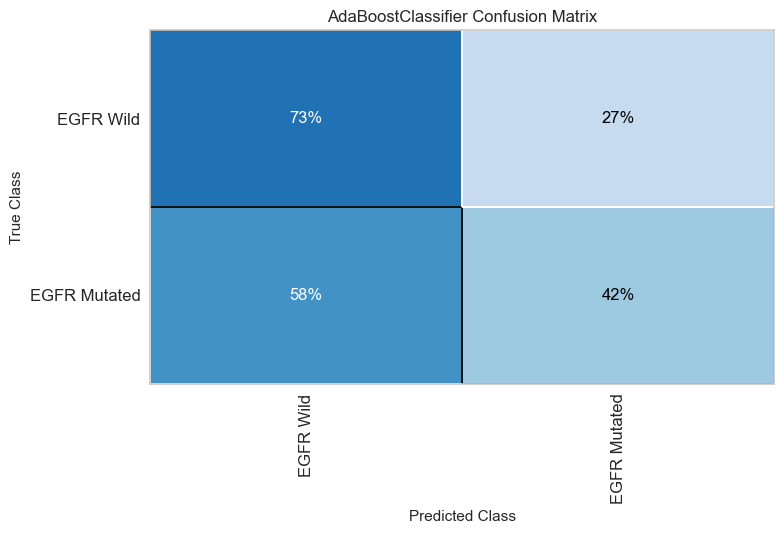

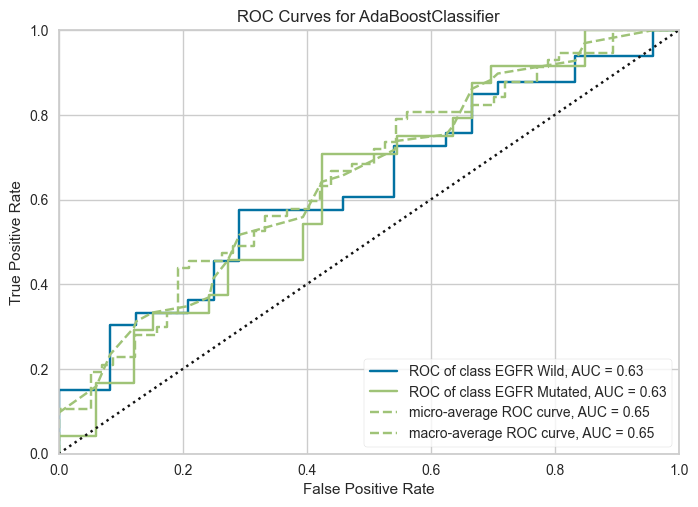

NameError: name 'X' is not defined

In [63]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)
report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [64]:
# # GradientBoostingClassifier # 0.883117

gbdt_model = GradientBoostingClassifier()
gbdt_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.6, 0.7,0.8],
              "n_estimators": [ 200,500,800,1000,2000,3000,5000]#
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

gbdt_cv_model = GridSearchCV(gbdt_model, gbdt_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gbdt_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


{'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.6}

In [65]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.7192982456140351

In [66]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--RFFI-gbdt', Save_format = 'csv',Save_type = 'col')

In [67]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--RFFI-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.76      0.76      0.76        33
EGFR Mutated       0.67      0.67      0.67        24

    accuracy                           0.72        57
   macro avg       0.71      0.71      0.71        57
weighted avg       0.72      0.72      0.72        57

precision 0.6666666666666666 accuracy 0.7192982456140351 recall 0.6666666666666666 auc 0.712121212121212


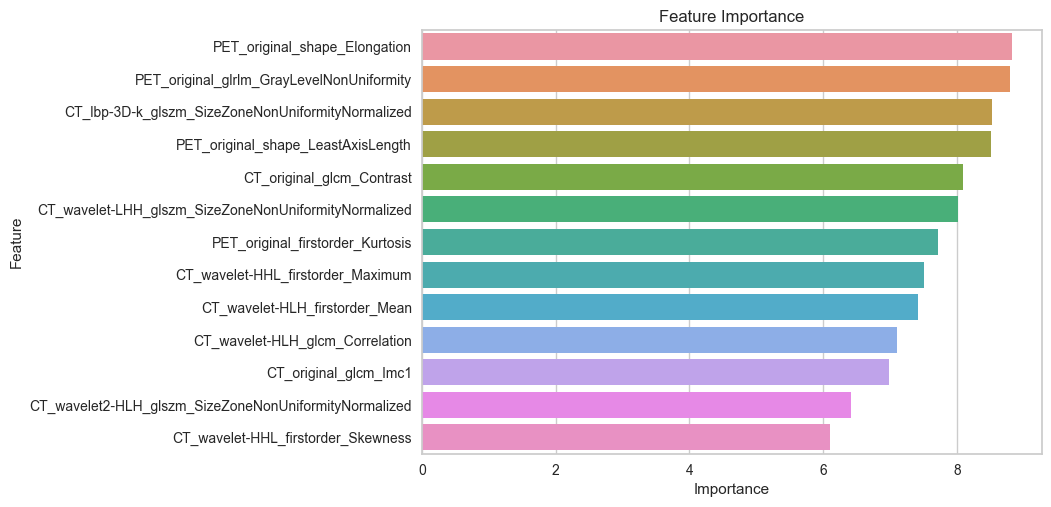

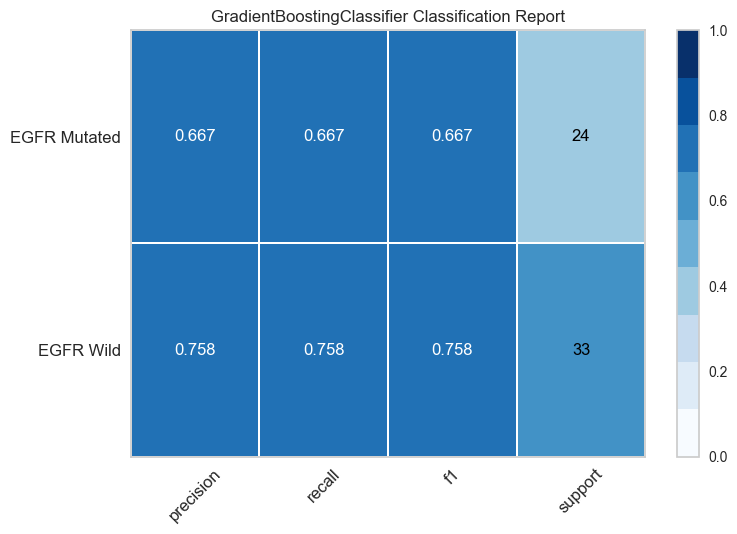

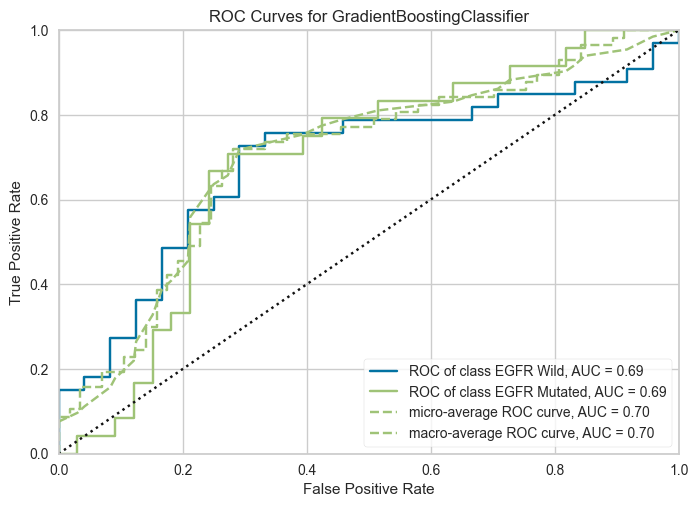

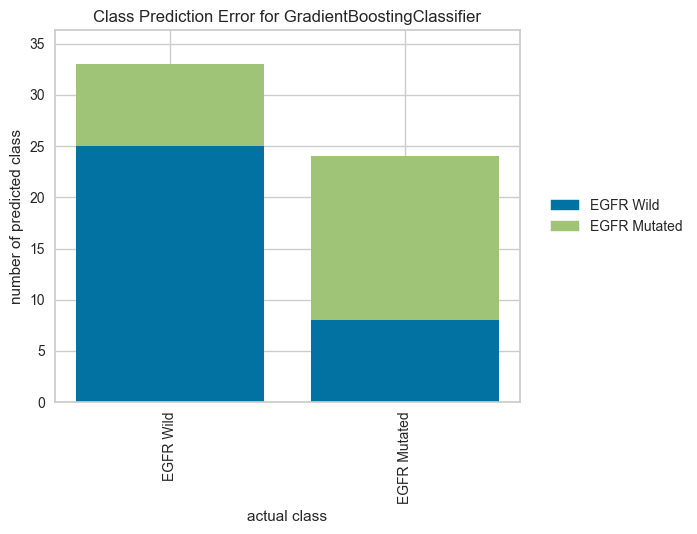

NameError: name 'X' is not defined

In [68]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [31]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(gbdt_tuned)
shap_values = explainer.shap_values(X_train)

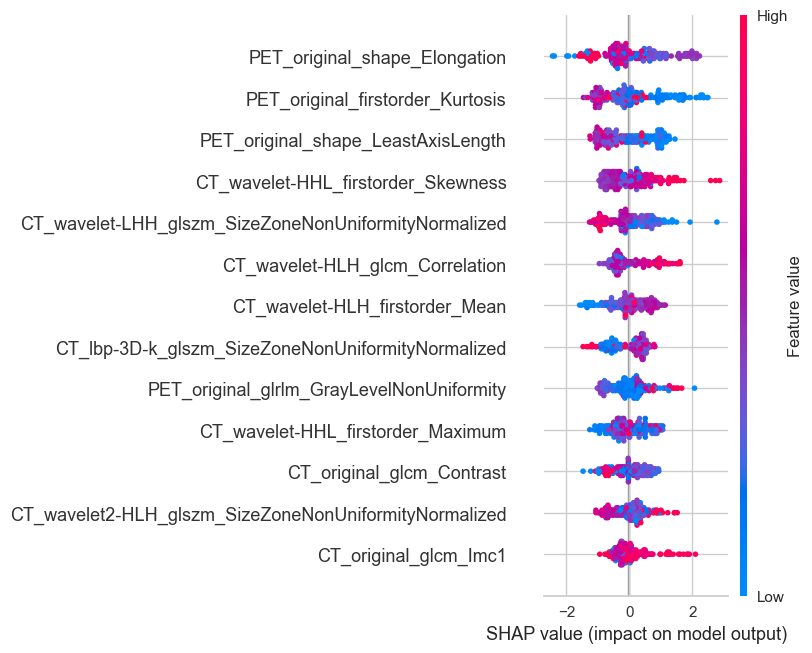

In [32]:
shap.summary_plot(shap_values, X_train)

In [69]:
# XGBClassifier # 0.883117

xgb_model = XGBClassifier(random_state=42)
xgb_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [ 500,1000,2000,3000,5000,10000],
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
              "max_depth": [1,2,3,4, 5, 8, None]}

xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
xgb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2000, 'subsample': 0.5}

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}

In [70]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6842105263157895

In [71]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RFFI-XGB73', Save_format = 'csv',Save_type = 'col')

In [72]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RFFI-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.69      0.82      0.75        33
EGFR Mutated       0.67      0.50      0.57        24

    accuracy                           0.68        57
   macro avg       0.68      0.66      0.66        57
weighted avg       0.68      0.68      0.67        57

precision 0.6666666666666666 accuracy 0.6842105263157895 recall 0.5 auc 0.659090909090909


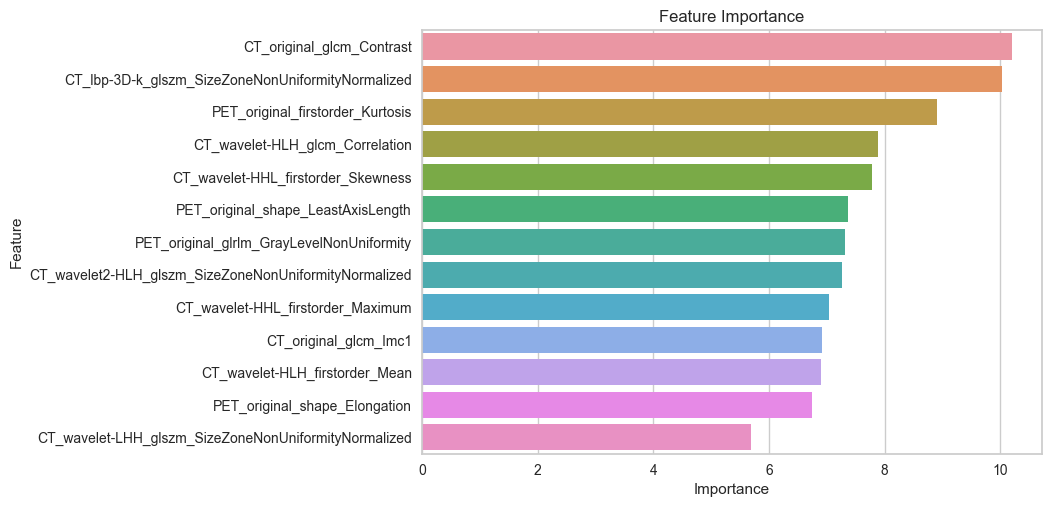

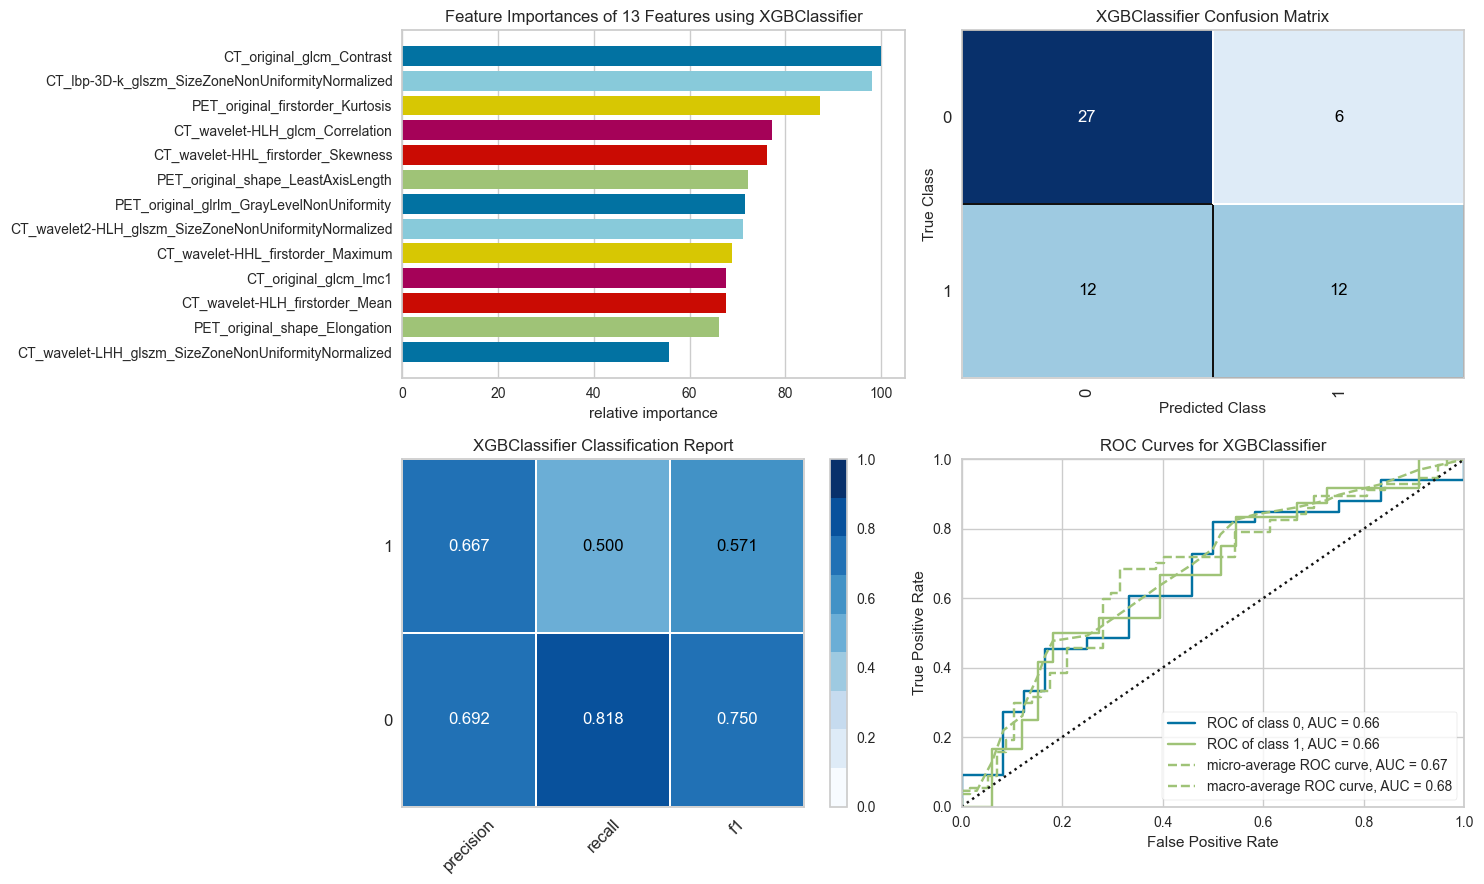

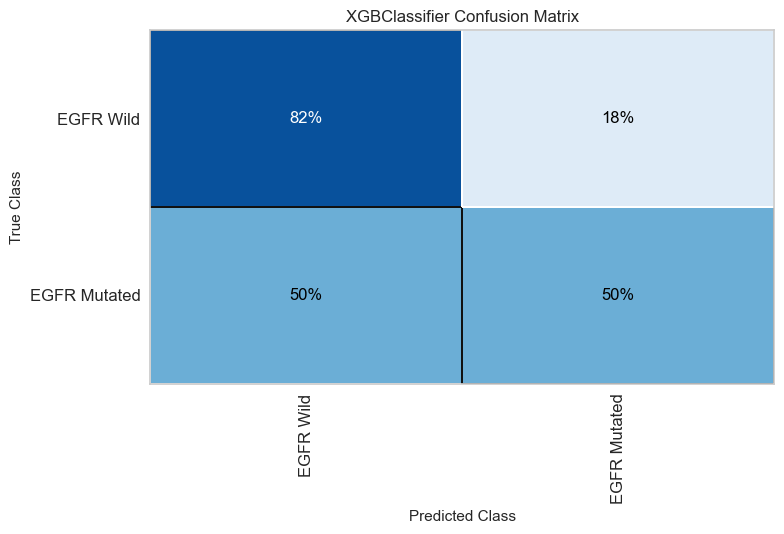

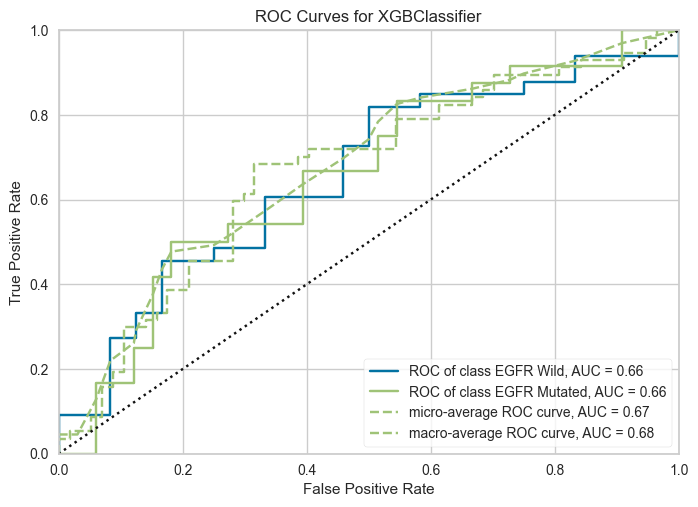

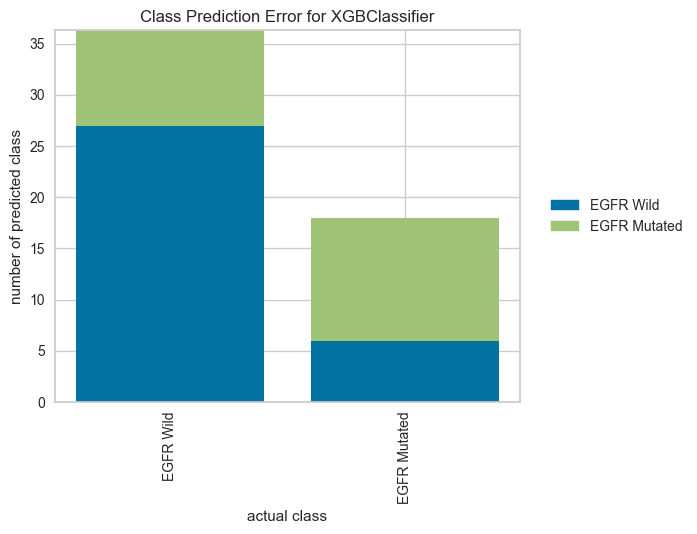

In [73]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [74]:
# LightGBMClassifier # 0.857143

lgbm_model = LGBMClassifier(random_state=42)
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2,0.5],
               "n_estimators": [200,500, 800,1000, 1500,2000,3000,5000],
               "max_depth": [1,2,3,4, 5,6, 8,None]}

lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
lgbm_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


{'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 2000}

In [75]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6491228070175439

In [76]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RFFI-lgb73', Save_format = 'csv',Save_type = 'col')

In [77]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RFFI-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.65      0.85      0.74        33
EGFR Mutated       0.64      0.38      0.47        24

    accuracy                           0.65        57
   macro avg       0.65      0.61      0.61        57
weighted avg       0.65      0.65      0.63        57

precision 0.6428571428571429 accuracy 0.6491228070175439 recall 0.375 auc 0.6117424242424243


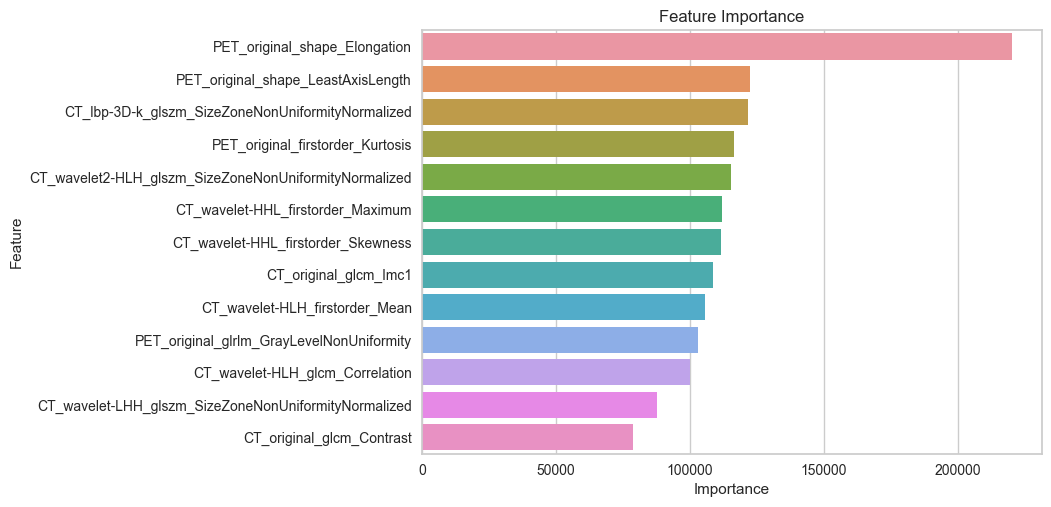

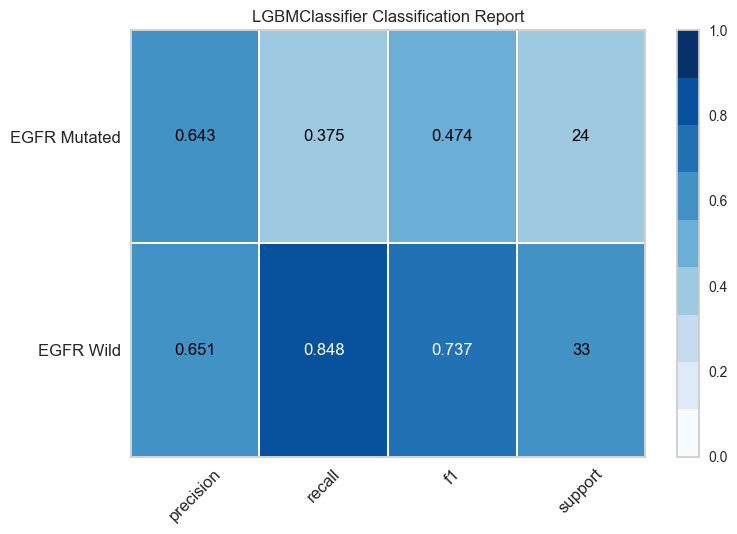

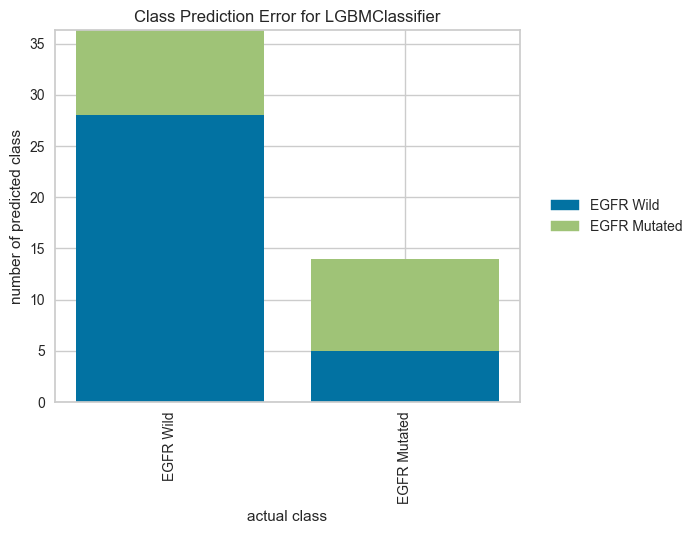

In [78]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

In [79]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_train)




In [80]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

In [81]:
shap.dependence_plot(y_train, shap_values, X_train)

TypeError: The passed shap_values are a list not an array! If you have a list of explanations try passing shap_values[0] instead to explain the first output class of a multi-output model.

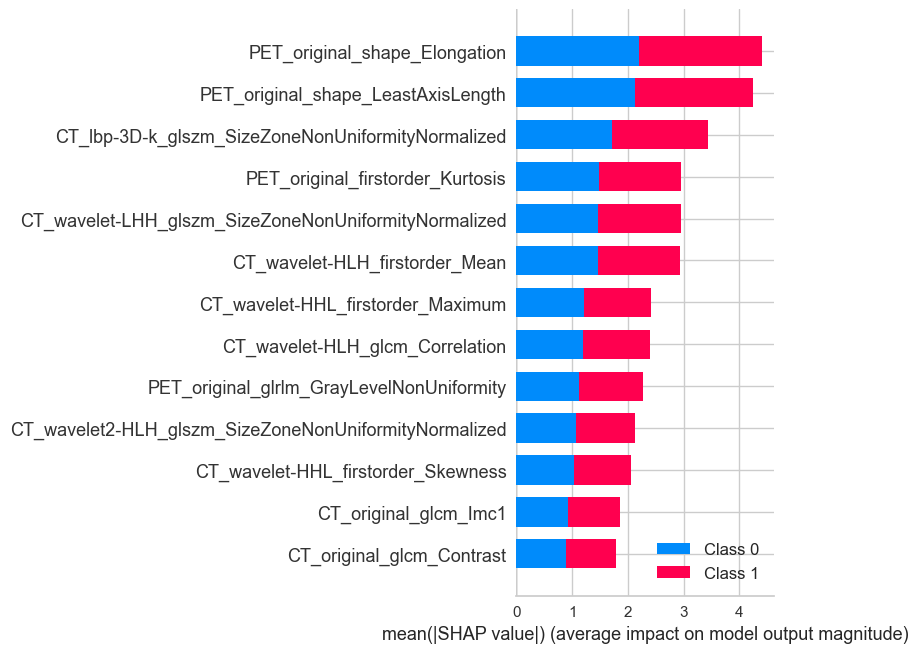

In [82]:
shap.summary_plot(shap_values, X_train)

In [83]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [84]:
import shap
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_test)


In [85]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.488636
RF: 0.587121
XGBoost: 0.659091
LightGBM: 0.611742
0:	learn: 0.6879982	total: 922us	remaining: 1.84s
1:	learn: 0.6819761	total: 1.6ms	remaining: 1.6s
2:	learn: 0.6768594	total: 2.13ms	remaining: 1.42s
3:	learn: 0.6738625	total: 2.65ms	remaining: 1.32s
4:	learn: 0.6693151	total: 3.15ms	remaining: 1.26s
5:	learn: 0.6653148	total: 3.65ms	remaining: 1.21s
6:	learn: 0.6630758	total: 4.15ms	remaining: 1.18s
7:	learn: 0.6605591	total: 4.64ms	remaining: 1.16s
8:	learn: 0.6577661	total: 5.13ms	remaining: 1.13s
9:	learn: 0.6537240	total: 5.62ms	remaining: 1.12s
10:	learn: 0.6494823	total: 6.18ms	remaining: 1.12s
11:	learn: 0.6460676	total: 6.76ms	remaining: 1.12s
12:	learn: 0.6427749	total: 7.34ms	remaining: 1.12s
13:	learn: 0.6395043	total: 7.87ms	remaining: 1.12s
14:	learn: 0.6361393	total: 8.36ms	remaining: 1.1s
15:	learn: 0.6326914	total: 8.82ms	remaining: 1.09s
16:	learn: 0.6288833	to

259:	learn: 0.2968382	total: 130ms	remaining: 868ms
260:	learn: 0.2957221	total: 130ms	remaining: 868ms
261:	learn: 0.2947072	total: 131ms	remaining: 868ms
262:	learn: 0.2938682	total: 131ms	remaining: 868ms
263:	learn: 0.2929826	total: 132ms	remaining: 867ms
264:	learn: 0.2918601	total: 132ms	remaining: 867ms
265:	learn: 0.2914381	total: 133ms	remaining: 866ms
266:	learn: 0.2907880	total: 133ms	remaining: 866ms
267:	learn: 0.2895655	total: 134ms	remaining: 865ms
268:	learn: 0.2887939	total: 134ms	remaining: 865ms
269:	learn: 0.2877924	total: 135ms	remaining: 863ms
270:	learn: 0.2870401	total: 135ms	remaining: 863ms
271:	learn: 0.2857006	total: 136ms	remaining: 862ms
272:	learn: 0.2848210	total: 136ms	remaining: 861ms
273:	learn: 0.2835180	total: 137ms	remaining: 860ms
274:	learn: 0.2829448	total: 137ms	remaining: 859ms
275:	learn: 0.2822835	total: 137ms	remaining: 858ms
276:	learn: 0.2820621	total: 138ms	remaining: 858ms
277:	learn: 0.2811492	total: 138ms	remaining: 857ms
278:	learn: 

592:	learn: 0.1120815	total: 290ms	remaining: 688ms
593:	learn: 0.1118992	total: 290ms	remaining: 687ms
594:	learn: 0.1115204	total: 291ms	remaining: 687ms
595:	learn: 0.1111870	total: 292ms	remaining: 687ms
596:	learn: 0.1109402	total: 292ms	remaining: 687ms
597:	learn: 0.1105463	total: 293ms	remaining: 686ms
598:	learn: 0.1104458	total: 293ms	remaining: 686ms
599:	learn: 0.1101249	total: 294ms	remaining: 685ms
600:	learn: 0.1097913	total: 294ms	remaining: 685ms
601:	learn: 0.1091655	total: 295ms	remaining: 684ms
602:	learn: 0.1087232	total: 295ms	remaining: 684ms
603:	learn: 0.1082585	total: 296ms	remaining: 683ms
604:	learn: 0.1079126	total: 296ms	remaining: 683ms
605:	learn: 0.1076025	total: 297ms	remaining: 682ms
606:	learn: 0.1075047	total: 297ms	remaining: 681ms
607:	learn: 0.1071380	total: 297ms	remaining: 681ms
608:	learn: 0.1069442	total: 298ms	remaining: 680ms
609:	learn: 0.1066616	total: 298ms	remaining: 680ms
610:	learn: 0.1066098	total: 299ms	remaining: 679ms
611:	learn: 

923:	learn: 0.0534035	total: 450ms	remaining: 524ms
924:	learn: 0.0532137	total: 450ms	remaining: 523ms
925:	learn: 0.0531965	total: 451ms	remaining: 523ms
926:	learn: 0.0530724	total: 451ms	remaining: 522ms
927:	learn: 0.0529186	total: 452ms	remaining: 522ms
928:	learn: 0.0529047	total: 452ms	remaining: 522ms
929:	learn: 0.0528980	total: 453ms	remaining: 521ms
930:	learn: 0.0528659	total: 453ms	remaining: 521ms
931:	learn: 0.0527336	total: 454ms	remaining: 520ms
932:	learn: 0.0527076	total: 454ms	remaining: 520ms
933:	learn: 0.0525465	total: 455ms	remaining: 519ms
934:	learn: 0.0523703	total: 455ms	remaining: 519ms
935:	learn: 0.0522507	total: 456ms	remaining: 518ms
936:	learn: 0.0521496	total: 456ms	remaining: 518ms
937:	learn: 0.0520734	total: 457ms	remaining: 517ms
938:	learn: 0.0519472	total: 457ms	remaining: 517ms
939:	learn: 0.0518532	total: 458ms	remaining: 516ms
940:	learn: 0.0517595	total: 458ms	remaining: 516ms
941:	learn: 0.0516323	total: 459ms	remaining: 515ms
942:	learn: 

1260:	learn: 0.0300722	total: 610ms	remaining: 357ms
1261:	learn: 0.0299917	total: 610ms	remaining: 357ms
1262:	learn: 0.0299374	total: 611ms	remaining: 356ms
1263:	learn: 0.0298764	total: 611ms	remaining: 356ms
1264:	learn: 0.0298417	total: 612ms	remaining: 355ms
1265:	learn: 0.0297998	total: 612ms	remaining: 355ms
1266:	learn: 0.0297492	total: 613ms	remaining: 354ms
1267:	learn: 0.0297029	total: 613ms	remaining: 354ms
1268:	learn: 0.0296904	total: 614ms	remaining: 354ms
1269:	learn: 0.0296248	total: 614ms	remaining: 353ms
1270:	learn: 0.0295317	total: 615ms	remaining: 353ms
1271:	learn: 0.0294883	total: 615ms	remaining: 352ms
1272:	learn: 0.0294101	total: 616ms	remaining: 352ms
1273:	learn: 0.0293416	total: 616ms	remaining: 351ms
1274:	learn: 0.0292994	total: 616ms	remaining: 351ms
1275:	learn: 0.0292652	total: 617ms	remaining: 350ms
1276:	learn: 0.0291587	total: 617ms	remaining: 350ms
1277:	learn: 0.0290740	total: 618ms	remaining: 349ms
1278:	learn: 0.0290324	total: 618ms	remaining:

1602:	learn: 0.0192320	total: 769ms	remaining: 191ms
1603:	learn: 0.0192152	total: 770ms	remaining: 190ms
1604:	learn: 0.0192129	total: 771ms	remaining: 190ms
1605:	learn: 0.0192068	total: 771ms	remaining: 189ms
1606:	learn: 0.0191782	total: 772ms	remaining: 189ms
1607:	learn: 0.0191460	total: 772ms	remaining: 188ms
1608:	learn: 0.0191283	total: 773ms	remaining: 188ms
1609:	learn: 0.0190958	total: 773ms	remaining: 187ms
1610:	learn: 0.0190756	total: 774ms	remaining: 187ms
1611:	learn: 0.0190446	total: 774ms	remaining: 186ms
1612:	learn: 0.0190434	total: 775ms	remaining: 186ms
1613:	learn: 0.0190031	total: 775ms	remaining: 185ms
1614:	learn: 0.0189998	total: 776ms	remaining: 185ms
1615:	learn: 0.0189649	total: 776ms	remaining: 184ms
1616:	learn: 0.0189614	total: 777ms	remaining: 184ms
1617:	learn: 0.0189415	total: 777ms	remaining: 184ms
1618:	learn: 0.0189273	total: 778ms	remaining: 183ms
1619:	learn: 0.0189076	total: 778ms	remaining: 183ms
1620:	learn: 0.0188762	total: 779ms	remaining:

1902:	learn: 0.0140988	total: 925ms	remaining: 47.1ms
1903:	learn: 0.0140846	total: 925ms	remaining: 46.7ms
1904:	learn: 0.0140660	total: 926ms	remaining: 46.2ms
1905:	learn: 0.0140548	total: 927ms	remaining: 45.7ms
1906:	learn: 0.0140517	total: 927ms	remaining: 45.2ms
1907:	learn: 0.0140372	total: 928ms	remaining: 44.7ms
1908:	learn: 0.0140213	total: 928ms	remaining: 44.2ms
1909:	learn: 0.0139965	total: 928ms	remaining: 43.8ms
1910:	learn: 0.0139842	total: 929ms	remaining: 43.3ms
1911:	learn: 0.0139842	total: 929ms	remaining: 42.8ms
1912:	learn: 0.0139725	total: 930ms	remaining: 42.3ms
1913:	learn: 0.0139621	total: 930ms	remaining: 41.8ms
1914:	learn: 0.0139421	total: 931ms	remaining: 41.3ms
1915:	learn: 0.0139346	total: 931ms	remaining: 40.8ms
1916:	learn: 0.0139236	total: 932ms	remaining: 40.3ms
1917:	learn: 0.0139151	total: 932ms	remaining: 39.9ms
1918:	learn: 0.0139001	total: 933ms	remaining: 39.4ms
1919:	learn: 0.0138752	total: 933ms	remaining: 38.9ms
1920:	learn: 0.0138737	total

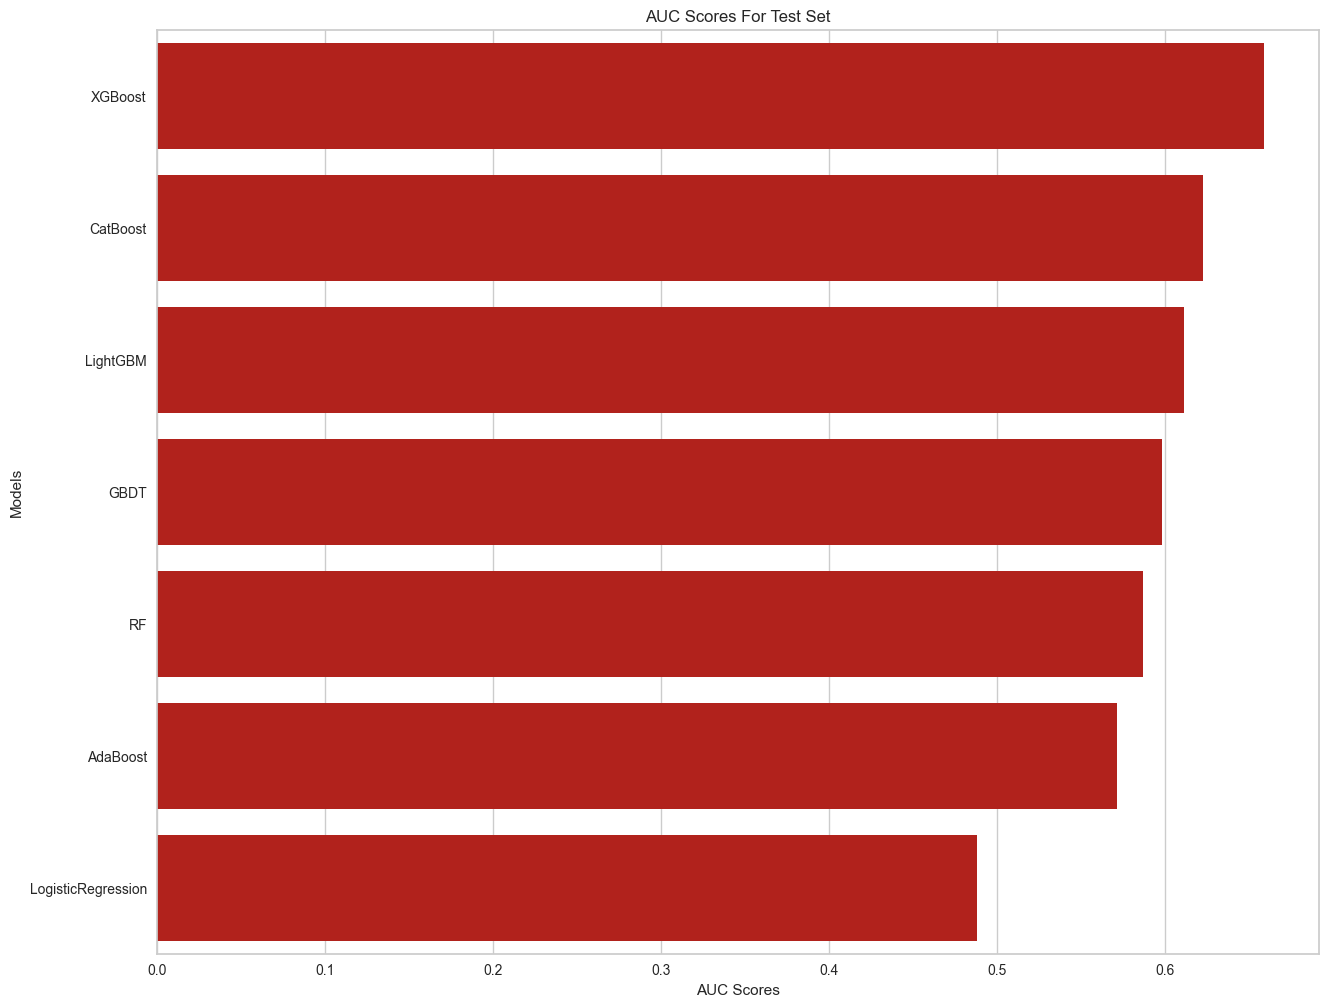

In [87]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [
    ('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
                ('XGBoost', xgb_tuned),
                ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned),
#                 ('SVM', svm_tuned),
                ('GBDT', gbdt_tuned),
#                 ('NGBoost', ngb_tuned),
#                 ('DT', dt_tuned),
                ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

In [44]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=xgb_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


NameError: name 'xgb_tuned' is not defined

In [45]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [46]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

NameError: name 'dt_tuned' is not defined

In [47]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--RFFI-stack73', Save_format = 'csv',Save_type = 'col')

In [88]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/RFE-RF-GB/RFFI")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [89]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [90]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split/ExternalTest-FS-ZSCORE-MI-RFFI.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [91]:
OSPath = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/1-teston-xk/split"

In [92]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.47      0.67      0.55        42
EGFR Mutated       0.66      0.47      0.55        58

    accuracy                           0.55       100
   macro avg       0.57      0.57      0.55       100
weighted avg       0.58      0.55      0.55       100

precision 0.6585365853658537 accuracy 0.55 recall 0.46551724137931033 auc 0.5660919540229885


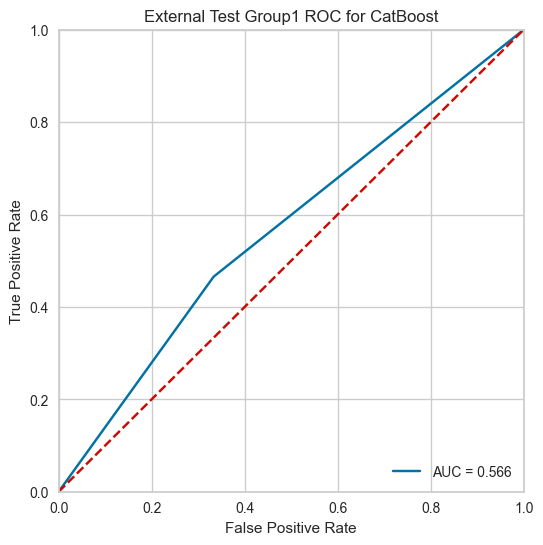

In [93]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [94]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[28 14]
 [31 27]]
Normalized confusion matrix
[[0.67 0.33]
 [0.53 0.47]]


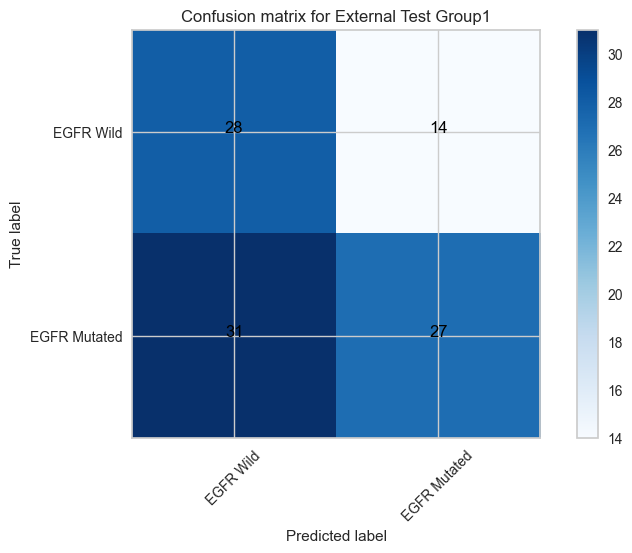

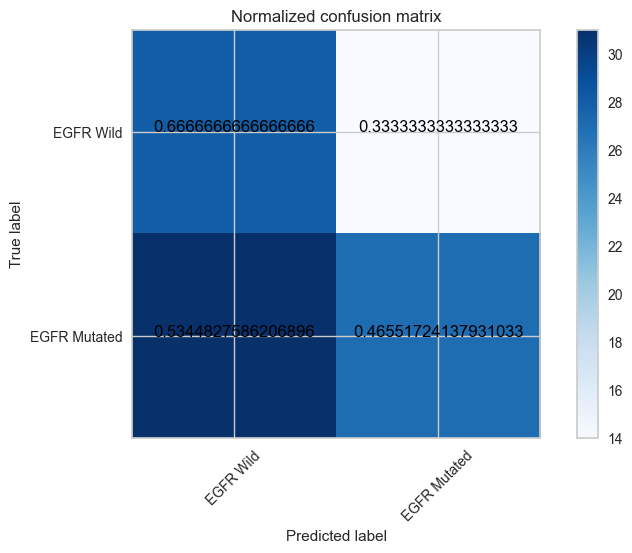

In [95]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [96]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.52      0.79      0.63        42
EGFR Mutated       0.76      0.48      0.59        58

    accuracy                           0.61       100
   macro avg       0.64      0.63      0.61       100
weighted avg       0.66      0.61      0.61       100

precision 0.7567567567567568 accuracy 0.61 recall 0.4827586206896552 auc 0.6342364532019704


In [97]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [98]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[33  9]
 [30 28]]
Normalized confusion matrix
[[0.79 0.21]
 [0.52 0.48]]


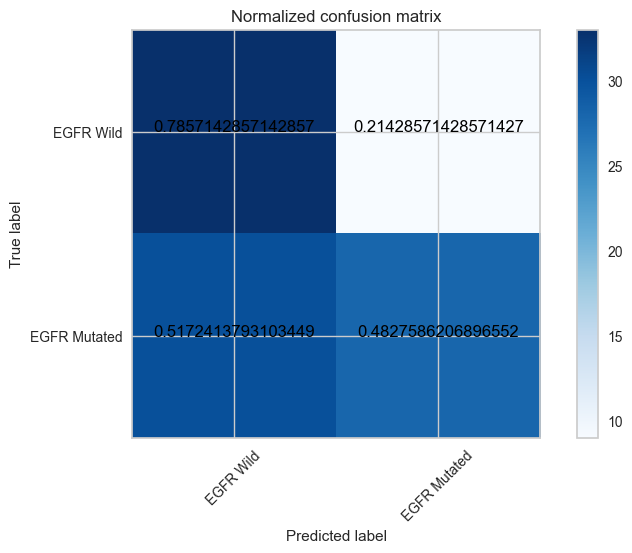

In [99]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [100]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

   EGFR Wild       0.45      0.67      0.54        42
EGFR Mutated       0.63      0.41      0.50        58

    accuracy                           0.52       100
   macro avg       0.54      0.54      0.52       100
weighted avg       0.56      0.52      0.52       100

precision 0.5415959252971138 accuracy 0.52 recall 0.5402298850574713 auc 0.5402298850574713


In [101]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [102]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[28 14]
 [34 24]]
Normalized confusion matrix
[[0.67 0.33]
 [0.59 0.41]]


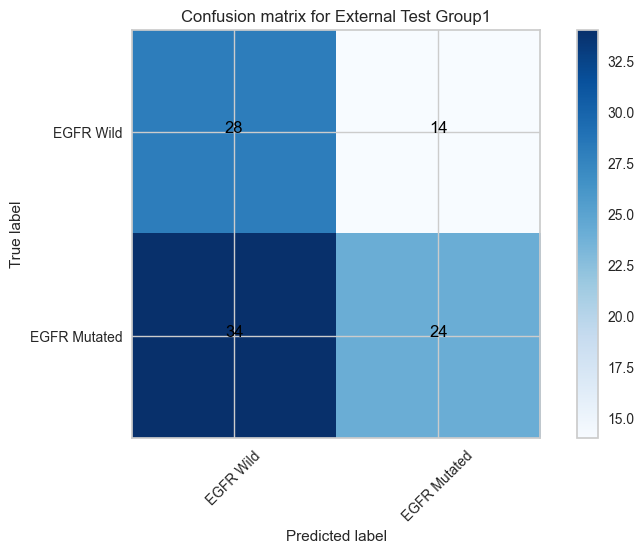

In [103]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [104]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.51      0.79      0.62        42
EGFR Mutated       0.74      0.45      0.56        58

    accuracy                           0.59       100
   macro avg       0.63      0.62      0.59       100
weighted avg       0.64      0.59      0.58       100

precision 0.7428571428571429 accuracy 0.59 recall 0.4482758620689655 auc 0.6169950738916257


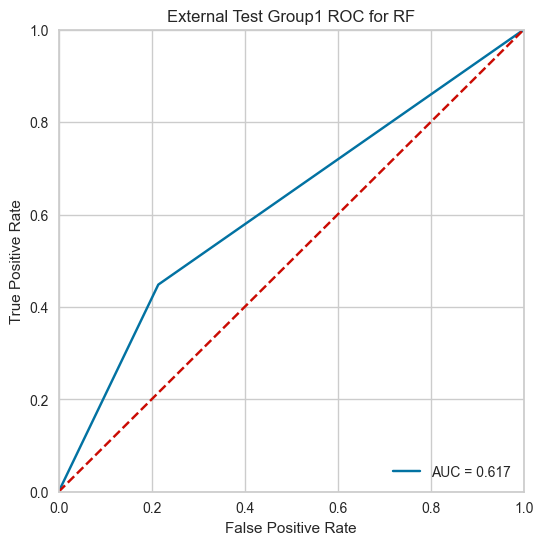

In [105]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[33  9]
 [32 26]]
Normalized confusion matrix
[[0.79 0.21]
 [0.55 0.45]]


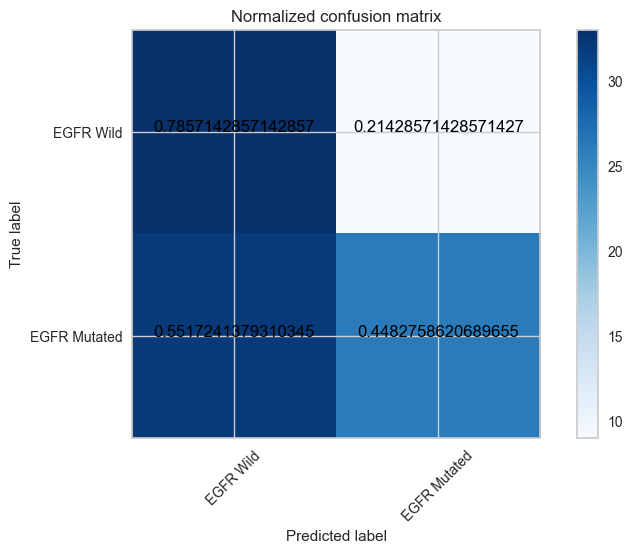

In [106]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [107]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.44      0.83      0.57        42
EGFR Mutated       0.65      0.22      0.33        58

    accuracy                           0.48       100
   macro avg       0.54      0.53      0.45       100
weighted avg       0.56      0.48      0.43       100

precision 0.65 accuracy 0.48 recall 0.22413793103448276 auc 0.5287356321839081


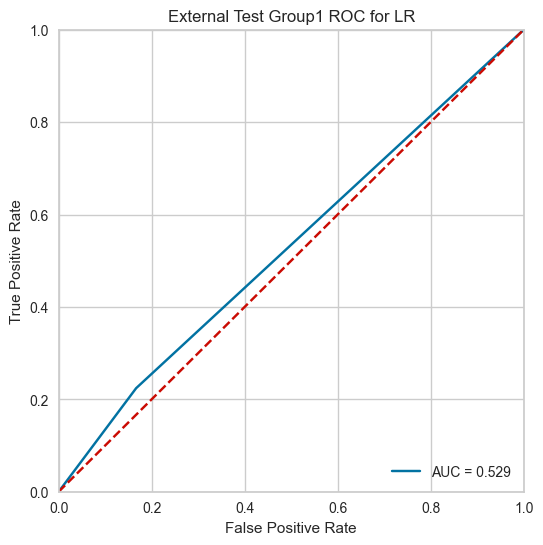

In [108]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[35  7]
 [45 13]]
Normalized confusion matrix
[[0.83 0.17]
 [0.78 0.22]]


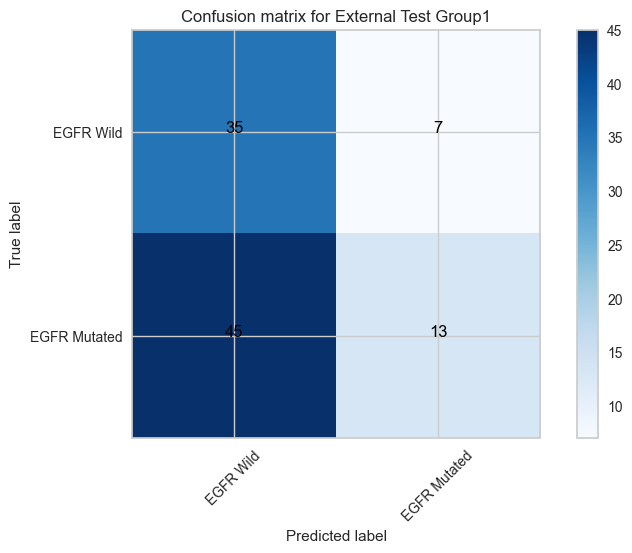

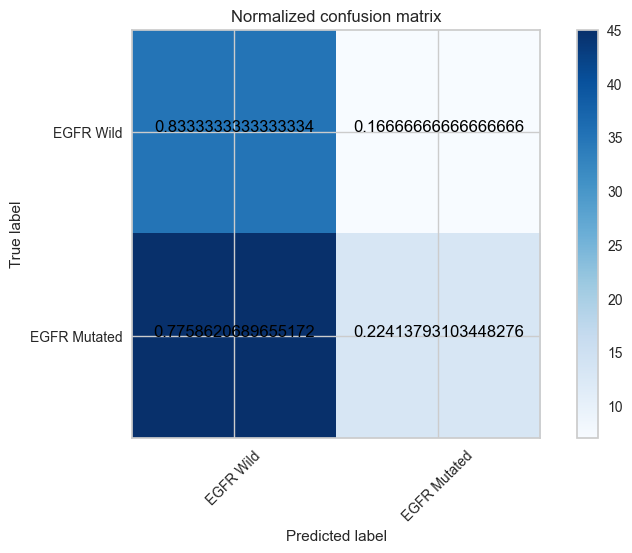

In [109]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [110]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.52      0.74      0.61        42
EGFR Mutated       0.72      0.50      0.59        58

    accuracy                           0.60       100
   macro avg       0.62      0.62      0.60       100
weighted avg       0.64      0.60      0.60       100

precision 0.725 accuracy 0.6 recall 0.5 auc 0.6190476190476191


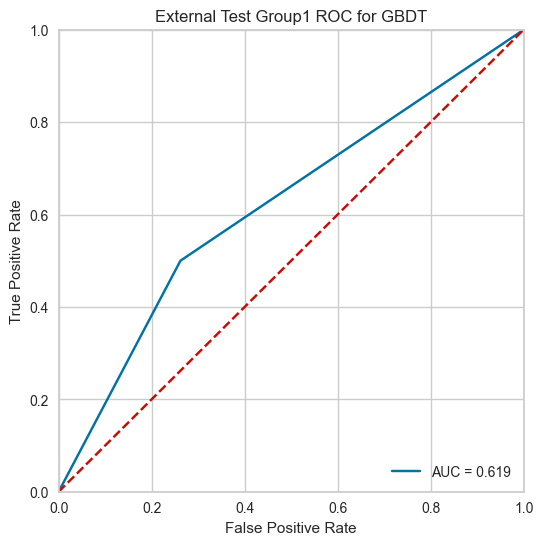

In [111]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [112]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[31 11]
 [29 29]]
Normalized confusion matrix
[[0.74 0.26]
 [0.5  0.5 ]]


In [113]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.47      0.71      0.57        42
EGFR Mutated       0.67      0.41      0.51        58

    accuracy                           0.54       100
   macro avg       0.57      0.56      0.54       100
weighted avg       0.58      0.54      0.53       100

precision 0.6666666666666666 accuracy 0.54 recall 0.41379310344827586 auc 0.5640394088669951


In [114]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[30 12]
 [34 24]]
Normalized confusion matrix
[[0.71 0.29]
 [0.59 0.41]]


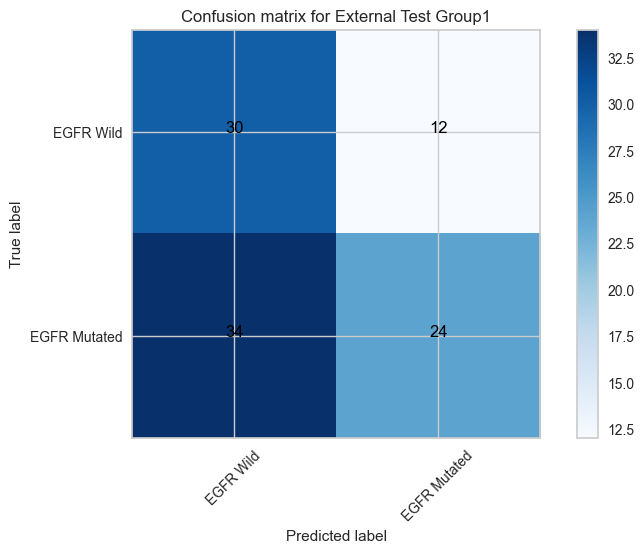

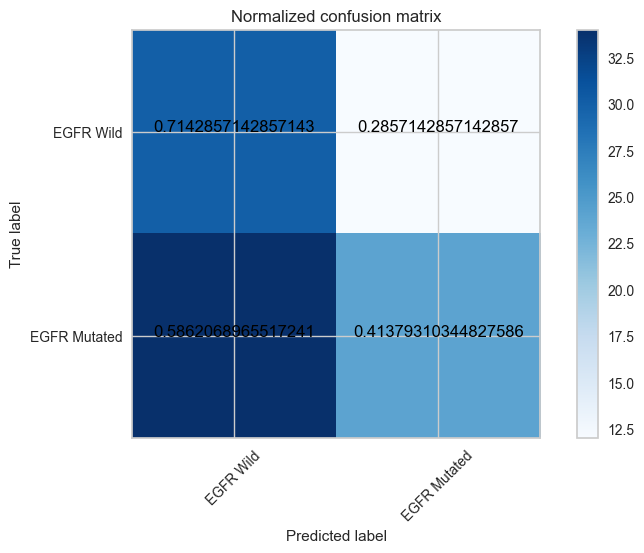

In [115]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()